# Cancer- Modeling

**Author's Name: Haya Hadaya**

**Table of Content:**

1.[Introduction](#Introduction)

2.[Data Dictionary](#Data-Dictionary)

3.[Part 1: Preprocessed Data Exploration](#Preprocessed-Data-Exploration)

4.[Part 2: Feature Engineering & Preprocessing](#Feature-Engineering-&-Preprocessing)

5.[Part 3: Baseline Modeling](#Baseline-Modeling)
- [Part 3.1 Logestic Regression Model](#Logestic-Regression-Model)
- [Part 3.2 Random Forest Classifier](#Random-Forest-Classifier)
- [Part 3.3 XGBoost Classifier](#XGBoost-Classifier)
- [Part 3.4 Neural Network](#Neural-Network)

6.[Models Comparison](#Models-Comparison)

7.[Conclusion](#Conclusion)

## Introduction<a id="Introduction"></a>

This report delves deeply into dataset preparation, preprocessing, and modeling, structured to establish a strong foundation by incorporating models. The preparatory steps include thorough data preprocessing involving infrequent value grouping in categorical variables and implementing PCA. Four key models—Logistic Regression, Random Forest, XGBoost, and Neural Network—evaluating their performance both with and without PCA. This strategy allows an assessment of how dimensionality reduction impacts model performance.

The model evaluation framework focuses on key metrics such as accuracy, recall, precision, F1 score, and ROC-AUC. Emphasizing beyond accuracy, particular attention is given to recall and precision, crucial in reflecting real-world performance. The models' performance is comprehensively assessed and compared across various dimensions: recall scores, the balance between recall and precision, the harmonized F1 score, and the overall discriminative capability represented by ROC-AUC.

Through this comprehensive evaluation, the report aims to establish a clear understanding of model performance under diverse conditions, shedding light on their suitability and effectiveness for practical real-world applications.

## Data Dictionary<a id="Data-Dictionary"></a>

|Features|Description|Values| 
|-----|:-----|:-----|
|_RFHLTH|Adults with good or better health|1:Good or Better Health, 2:Fair or Poor Health, 9:Don't know/Not Sure Or Refused/Missing| 
|SEXVAR|Sex of Respondent|1:Male, 2:Female|
| TOLDHI3 |High cholesterol levels|1:Yes, 2:No , 7:Don’t know/Not Sure Or Refused/Missing| 
| CHECKUP1 |About how long has it been since a person visited a doctor for a routine checkup|1:within past year, 2:Within past 2 years, 3:Within past 5 years ,4: 5 or more years ago , 7:Don’t know/Not sure, 8:Never , 9:Refused  |
| CHCCOPD3 |A person had C.O.P.D. (chronic obstructive pulmonary disease), emphysema or chronic bronchitis|1:Yes, 2:No , 7:Don’t know/Not Sure, 9: Refused  |
| HAVARTH5 | A person had some form of arthritis, rheumatoid arthritis, gout, lupus, or fibromyalgia|1:Yes, 2:No , 7:Don’t know/Not Sure, 9: Refused  |
 | DIABETE4 | A person had diabetes|1:Yes, 2:Yes, but female told only during pregnancy , 3:No , 4:No, pre-diabetes or borderline diabetes, 7:Don’t know/Not Sure, 9: Refused  |
| _RFHYPE6  | Adults who have been told they have high blood pressure|1:No, 2:Yes, 9:Don’t know/Not Sure/Refused/Missing|
| _PHYS14D |  3 level not good physical health status: 0 days, 1-13 days, 14-30 days|1:Zero days when physical health not good, 2:(1-13) days when physical health not good, 3:(14+) days when physical health not good , 9:Don’t know/Not Sure/Refused/Missing|
|_AGE_G | Six-level imputed age category|1:Age 18 to 24, 2:Age 25 to 34, 3: Age 35 to 44  , 4:Age 45 to 54 , 5:Age 55 to 64 , 6:Age 65 or older|
|_IMPRACE | Imputed race/ethnicity value|1: White, Non-Hispanic, 2: Black, Non-Hispanic, 3: Asian, Non-Hispanic,4:American Indian/Alaskan Native, Non-Hispanic, 5:Hispanic, 6:Other race, Non-Hispanic   |
|_RFBMI5 | Adults who have a body mass index greater than 25.00 (Overweight or Obese) |1:No , 2:Yes, 9:Don’t know/Refused/Missing |
|_SMOKER3 | Four-level smoker status: Everyday smoker, Someday smoker, Former smoker, Non-smoker |1:Current smoker, 2:Current smoker, 3:Former smoker , 4:Never smoked, 9:Don’t know/Refused/Missing |
|_RFDRHV7 | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)  |1:No , 2:Yes, 9:Don’t know/Refused/Missing |
|_TOTINDA | Adults who reported doing physical activity or exercise during the past 30 days other than their regular job  |1:Had physical activity or exercise, 2:No physical activity or exercise in last 30 days, 9:Don’t know/Refused/Missing |
|CHCKDNY2 |kidney disease presence|1:Yes, 2:No , 7:Don’t know / Not sure , 9:refused |
|_FRTLT1A |Consume Fruit 1 or more times per day|1:Consumed fruit one or more times per day, 2:Consumed fruit < one time per day , 9:Don´t know, refused or missing values |
|Cancer |Risk of presence or absence of Cancer|1:Presence of Cancer ,0:Absence of Cancer |


## Part 1:Preprocessed Data Exploration<a id="Preprocessed-Data-Exploration"></a>

We will start with importing some important libraries:

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import GridSearchCV
import plotly.graph_objects as go
from sklearn.metrics import precision_score, precision_recall_curve, roc_curve, roc_auc_score, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
import xgboost as xgb
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# filter warnings
import warnings
warnings.filterwarnings('ignore')

Now , we will load our data

In [5]:
# To load the data
df = pd.read_csv('cancer.csv')

To display and check our columns:

In [6]:
# To check all the columns in our dataset :
pd.set_option('display.max_columns', None)

In [7]:
#To get the first five rows we use .head function

display(df.head())

,Cancer,_RFHLTH_1.0,_RFHLTH_2.0,TOLDHI3_1.0,TOLDHI3_2.0,CHECKUP1_1.0,CHECKUP1_2.0,CHECKUP1_3.0,CHECKUP1_4.0,CHECKUP1_7.0,CHECKUP1_8.0,SEXVAR_2.0,CHCCOPD3_1.0,CHCCOPD3_2.0,CHCCOPD3_7.0,HAVARTH5_1.0,HAVARTH5_2.0,HAVARTH5_7.0,DIABETE4_1.0,DIABETE4_2.0,DIABETE4_3.0,DIABETE4_4.0,DIABETE4_7.0,_RFHYPE6_1.0,_RFHYPE6_2.0,_PHYS14D_1.0,_PHYS14D_2.0,_PHYS14D_3.0,_AGE_G_2.0,_AGE_G_3.0,_AGE_G_4.0,_AGE_G_5.0,_AGE_G_6.0,_IMPRACE_1.0,_IMPRACE_2.0,_IMPRACE_4.0,_IMPRACE_5.0,_IMPRACE_6.0,_RFBMI5_1.0,_RFBMI5_2.0,_SMOKER3_1.0,_SMOKER3_2.0,_SMOKER3_3.0,_SMOKER3_4.0,_RFDRHV7_1.0,_RFDRHV7_2.0,_TOTINDA_1.0,_TOTINDA_2.0,CHCKDNY2_1.0,CHCKDNY2_2.0,CHCKDNY2_7.0,_FRTLT1A_1.0,_FRTLT1A_2.0
0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0
1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0
2,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0
3,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0
4,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0


To check the shape of our dataset :

In [8]:
#To check the shape of the dataframe
df.shape

(438690, 53)

We have 438690 rows and 53 columns in our dataset.

To check for null values :

In [9]:
# Check for missing values
print(df.isnull().sum())

Cancer          0
_RFHLTH_1.0     0
_RFHLTH_2.0     0
TOLDHI3_1.0     0
TOLDHI3_2.0     0
CHECKUP1_1.0    0
CHECKUP1_2.0    0
CHECKUP1_3.0    0
CHECKUP1_4.0    0
CHECKUP1_7.0    0
CHECKUP1_8.0    0
SEXVAR_2.0      0
CHCCOPD3_1.0    0
CHCCOPD3_2.0    0
CHCCOPD3_7.0    0
HAVARTH5_1.0    0
HAVARTH5_2.0    0
HAVARTH5_7.0    0
DIABETE4_1.0    0
DIABETE4_2.0    0
DIABETE4_3.0    0
DIABETE4_4.0    0
DIABETE4_7.0    0
_RFHYPE6_1.0    0
_RFHYPE6_2.0    0
_PHYS14D_1.0    0
_PHYS14D_2.0    0
_PHYS14D_3.0    0
_AGE_G_2.0      0
_AGE_G_3.0      0
_AGE_G_4.0      0
_AGE_G_5.0      0
_AGE_G_6.0      0
_IMPRACE_1.0    0
_IMPRACE_2.0    0
_IMPRACE_4.0    0
_IMPRACE_5.0    0
_IMPRACE_6.0    0
_RFBMI5_1.0     0
_RFBMI5_2.0     0
_SMOKER3_1.0    0
_SMOKER3_2.0    0
_SMOKER3_3.0    0
_SMOKER3_4.0    0
_RFDRHV7_1.0    0
_RFDRHV7_2.0    0
_TOTINDA_1.0    0
_TOTINDA_2.0    0
CHCKDNY2_1.0    0
CHCKDNY2_2.0    0
CHCKDNY2_7.0    0
_FRTLT1A_1.0    0
_FRTLT1A_2.0    0
dtype: int64


There is zero null values

## Part 2: Feature Engineering & Preprocessing<a id="Feature-Engineering-&-Preprocessing"></a>

After creating dummy variables for all of our categorical columns , we will try to employ multiple dimensionality reduction techniques on the dataset, including both grouping infrequent values in categorical variables and applying PCA. We will start with grouping infrequent values in categorical variables to reduce Model Complexity,improve Generalization and enhance interpretability.

**1.Combining _AGE_G_2.0 and _AGE_G_3.0**

In [10]:
# Create a new column '_AGE_GROUP_(25-44)' by combining '_AGE_G_2.0' and '_AGE_G_3.0'
df['_AGE_GROUP_(25-44)'] = 0  # Initialize with 0

# Update values based on conditions
df.loc[(df['_AGE_G_2.0'] == 1) | (df['_AGE_G_3.0'] == 1), '_AGE_GROUP_(25-44)'] = 1

To ensure the accuracy of the combination process , we will count the number of individuals within the age range of 25-44 before and after combining :

In [11]:
# Store the counts of individuals in the age groups (25-34 and 35-44) before combination
count_before_combination = df[['_AGE_G_2.0', '_AGE_G_3.0']].sum().sum()
# Store the counts of individuals in the age group (25-44) after combination
count_after_combination = df['_AGE_GROUP_(25-44)'].sum()

# Compare the counts before and after combination
if count_before_combination == count_after_combination:
    print("Counts match: Number of individuals within the age range (25-44) remains the same.")
else:
    print("Counts do not match: There might be an issue in the combination.")

Counts match: Number of individuals within the age range (25-44) remains the same.


The number of individuals within the age range of 25-44 before and after combining the age groups remains equal.

Now , we can drop the individual columns,

In [12]:
# Drop the individual columns if needed
df.drop(['_AGE_G_2.0', '_AGE_G_3.0'], axis=1, inplace=True)

**2.Combining _AGE_G_4.0 and _AGE_G_5.0**

In [13]:
# Create a new column '_AGE_GROUP_(45-64)' by combining '_AGE_G_4.0' and '_AGE_G_5.0'
df['_AGE_GROUP_(45-64)'] = 0  # Initialize with 0

# Update values based on conditions
df.loc[(df['_AGE_G_4.0'] == 1) | (df['_AGE_G_5.0'] == 1), '_AGE_GROUP_(45-64)'] = 1


To ensure the accuracy of the combination process , we will count the number of individuals within the age range of 45-64 before and after combining :

In [14]:
# Store the counts of individuals in the age groups (45-54 and 55-64) before combination
count_before_combination = df[['_AGE_G_4.0', '_AGE_G_5.0']].sum().sum()
# Store the counts of individuals in the age group (45-64) after combination
count_after_combination = df['_AGE_GROUP_(45-64)'].sum()

# Compare the counts before and after combination
if count_before_combination == count_after_combination:
    print("Counts match: Number of individuals within the age range (45-64) remains the same.")
else:
    print("Counts do not match: There might be an issue in the combination.")

Counts match: Number of individuals within the age range (45-64) remains the same.


The number of individuals within the age range of 45-64 before and after combining the age groups remains equal.

Now , we can drop the individual columns,

In [15]:
# Drop the individual columns 
df.drop(['_AGE_G_4.0', '_AGE_G_5.0'], axis=1, inplace=True)

In [16]:
#Sanity check for our updated dataframe
df.head()

,Cancer,_RFHLTH_1.0,_RFHLTH_2.0,TOLDHI3_1.0,TOLDHI3_2.0,CHECKUP1_1.0,CHECKUP1_2.0,CHECKUP1_3.0,CHECKUP1_4.0,CHECKUP1_7.0,CHECKUP1_8.0,SEXVAR_2.0,CHCCOPD3_1.0,CHCCOPD3_2.0,CHCCOPD3_7.0,HAVARTH5_1.0,HAVARTH5_2.0,HAVARTH5_7.0,DIABETE4_1.0,DIABETE4_2.0,DIABETE4_3.0,DIABETE4_4.0,DIABETE4_7.0,_RFHYPE6_1.0,_RFHYPE6_2.0,_PHYS14D_1.0,_PHYS14D_2.0,_PHYS14D_3.0,_AGE_G_6.0,_IMPRACE_1.0,_IMPRACE_2.0,_IMPRACE_4.0,_IMPRACE_5.0,_IMPRACE_6.0,_RFBMI5_1.0,_RFBMI5_2.0,_SMOKER3_1.0,_SMOKER3_2.0,_SMOKER3_3.0,_SMOKER3_4.0,_RFDRHV7_1.0,_RFDRHV7_2.0,_TOTINDA_1.0,_TOTINDA_2.0,CHCKDNY2_1.0,CHCKDNY2_2.0,CHCKDNY2_7.0,_FRTLT1A_1.0,_FRTLT1A_2.0,_AGE_GROUP_(25-44),_AGE_GROUP_(45-64)
0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0
1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0
2,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0
3,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1
4,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0


Now , we will find the variance for each feature.Variance can aid in feature selection by providing insights into the discriminatory power and usefulness of each feature in a dataset. 

In [17]:
variance_per_variable = df.var()  # Calculate variance for each column

print(variance_per_variable)

Cancer                0.087216
_RFHLTH_1.0           0.140080
_RFHLTH_2.0           0.138320
TOLDHI3_1.0           0.224814
TOLDHI3_2.0           0.249835
CHECKUP1_1.0          0.177719
CHECKUP1_2.0          0.103214
CHECKUP1_3.0          0.050550
CHECKUP1_4.0          0.040372
CHECKUP1_7.0          0.011786
CHECKUP1_8.0          0.005240
SEXVAR_2.0            0.248747
CHCCOPD3_1.0          0.071822
CHCCOPD3_2.0          0.075848
CHCCOPD3_7.0          0.004073
HAVARTH5_1.0          0.219349
HAVARTH5_2.0          0.221615
HAVARTH5_7.0          0.005644
DIABETE4_1.0          0.114087
DIABETE4_2.0          0.008605
DIABETE4_3.0          0.137721
DIABETE4_4.0          0.022149
DIABETE4_7.0          0.001395
_RFHYPE6_1.0          0.239337
_RFHYPE6_2.0          0.238418
_PHYS14D_1.0          0.225654
_PHYS14D_2.0          0.163629
_PHYS14D_3.0          0.102712
_AGE_G_6.0            0.228903
_IMPRACE_1.0          0.183798
_IMPRACE_2.0          0.069821
_IMPRACE_4.0          0.016606
_IMPRACE

**Insights**

- High Variance Features: Notable features with higher variance include 'TOLDHI3_1.0', 'SEXVAR_2.0', _RFHYPE6_2.0 , '_FRTLT1A_2.0',_AGE_G_6.0 indicating more variability in these aspects within the dataset.

- Low Variance Features: Features such as 'CHECKUP1_7.0', 'CHECKUP1_8.0', 'CHCCOPD3_7.0', 'DIABETE4_7.0', 'CHCKDNY2_7.0' have very low variance, suggesting limited variability or potentially constant values, which might not provide much information for analysis.

- Potential Multicollinearity: Features like '_RFHYPE6_1.0' and '_RFHYPE6_2.0', '_FRTLT1A_1.0' and '_FRTLT1A_2.0', 'AGE_GROUP(25-44)' and 'AGE_GROUP(45-64)' show quite similar variance values. It might hint at potential multicollinearity issues between these pairs of features.

Now , we will split our data into train and test sets:

In [18]:
# X contains all columns except 'Cancer'
X = df.drop('Cancer', axis=1)  # Exclude the 'Cancer' column

# y contains only the 'Cancer' column
y = df['Cancer']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
#sanity check of the X_train dataset
X_train.head()

,_RFHLTH_1.0,_RFHLTH_2.0,TOLDHI3_1.0,TOLDHI3_2.0,CHECKUP1_1.0,CHECKUP1_2.0,CHECKUP1_3.0,CHECKUP1_4.0,CHECKUP1_7.0,CHECKUP1_8.0,SEXVAR_2.0,CHCCOPD3_1.0,CHCCOPD3_2.0,CHCCOPD3_7.0,HAVARTH5_1.0,HAVARTH5_2.0,HAVARTH5_7.0,DIABETE4_1.0,DIABETE4_2.0,DIABETE4_3.0,DIABETE4_4.0,DIABETE4_7.0,_RFHYPE6_1.0,_RFHYPE6_2.0,_PHYS14D_1.0,_PHYS14D_2.0,_PHYS14D_3.0,_AGE_G_6.0,_IMPRACE_1.0,_IMPRACE_2.0,_IMPRACE_4.0,_IMPRACE_5.0,_IMPRACE_6.0,_RFBMI5_1.0,_RFBMI5_2.0,_SMOKER3_1.0,_SMOKER3_2.0,_SMOKER3_3.0,_SMOKER3_4.0,_RFDRHV7_1.0,_RFDRHV7_2.0,_TOTINDA_1.0,_TOTINDA_2.0,CHCKDNY2_1.0,CHCKDNY2_2.0,CHCKDNY2_7.0,_FRTLT1A_1.0,_FRTLT1A_2.0,_AGE_GROUP_(25-44),_AGE_GROUP_(45-64)
349094,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0
107185,0,1,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0
80304,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1
105450,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1
30444,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,1,0


From our EDA , we found that the variables '_RFBMI5_1.0' and 'DIABETE4_7.0' are not statistically significant (p_value > 0.05), so we will drop them. 

In [20]:
columns_to_drop = ['_RFBMI5_1.0', 'DIABETE4_7.0']

X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

We wil apply PCA on our dataset to test it's effect on different models :

In [21]:
# Apply PCA on your dataset
pca = PCA(n_components=0.90)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## Part 3: Modeling<a id="Baseline-Modeling"></a>

In this phase, we'll train various models on both the original and PCA-transformed datasets to assess potential differences in performance. Additionally, we'll utilize the class_weight="balanced" parameter to address the imbalance in the dataset.

### Model 3.1 : Logistic Regression Model<a id="Logestic-Regression-Model"></a>

We will fit a logistic regression model on the PCA-transformed dataset:

In [125]:
logreg_pca = LogisticRegression(max_iter=1000, random_state=42,class_weight="balanced")
logreg_pca.fit(X_train_pca, y_train)

# Calculate accuracy with PCA using .score() on transformed data
accuracy_with_pca_train = logreg_pca.score(X_train_pca, y_train)
accuracy_with_pca = logreg_pca.score(X_test_pca, y_test)

print(f"Accuracy with PCA for train: {accuracy_with_pca_train}")
print(f"Accuracy with PCA for test: {accuracy_with_pca}")

Accuracy with PCA for train: 0.6542347671476442
Accuracy with PCA for test: 0.6529211972007568


Now , we will try to fit another model on the original dataset:

In [131]:
# Train a model without PCA
logreg_without_pca = LogisticRegression(max_iter=1000,random_state=42,class_weight="balanced")
logreg_without_pca.fit(X_train, y_train)

# Calculate accuracy without PCA using .score()
accuracy_without_pca_for_train= model_without_pca.score(X_train, y_train)
accuracy_without_pca = model_without_pca.score(X_test, y_test)
print(f"Accuracy without PCA for train:{accuracy_without_pca_for_train}")
print(f"Accuracy without PCA for test: {accuracy_without_pca}")

Accuracy without PCA for train:0.6502940573069822
Accuracy without PCA for test: 0.6489092525473569


Both models have reasonably close scores, but the PCA-processed data showcases a slightly better performance on the test set, indicating that the model built on the PCA-transformed data might generalize a bit better to unseen data. This suggests that the reduction in feature dimensions achieved by PCA hasn't significantly compromised the model's predictive capabilities, and it's managing to capture the underlying patterns in the data. However, it's important to note that this information alone isn't sufficient to decisively determine which model is better. Further evaluation across additional metrics is necessary to comprehensively assess the models' performance and make a more informed decision

We will use a GridSearchCV, to find the best 'C' parameter as the following for model with original dataset :

In [53]:
# Define your logistic regression model
logreg = LogisticRegression(max_iter=1000,random_state=42)

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']
}

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=cv, scoring='recall')

# Fit the GridSearchCV instance on your training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


Now , we will check if we get different parameters for a model with PCA-transformed dataset:

In [134]:
# Define your logistic regression model
logreg_pca = LogisticRegression(max_iter=1000,random_state=42)

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']
}

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(logreg_pca, param_grid, cv=cv, scoring='recall')

# Fit the GridSearchCV instance on your training data
grid_search.fit(X_train_pca, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}


We will add the best parameters to the model with original dataset:

In [37]:
# Train a model without PCA
logreg_without_pca = LogisticRegression(max_iter=1000, C= 0.01, penalty='l2' ,solver='liblinear',class_weight="balanced", random_state=42)
logreg_without_pca.fit(X_train, y_train)

# Calculate accuracy without PCA using .score()
accuracy_without_pca_for_train= logreg_without_pca.score(X_train, y_train)
accuracy_without_pca = logreg_without_pca.score(X_test, y_test)
print(f"Accuracy without PCA for train:{accuracy_without_pca_for_train}")
print(f"Accuracy without PCA for test: {accuracy_without_pca}")

Accuracy without PCA for train:0.6502370694567918
Accuracy without PCA for test: 0.6492169869383847


Now , we will calculate the recall for train and test for logreg_without_pca :

In [57]:
# Predictions on training data
train_predictions = logreg_without_pca.predict(X_train)

# Predictions on test data
test_predictions = logreg_without_pca.predict(X_test)

# Calculate recall on training data
train_recall = recall_score(y_train, train_predictions)

# Calculate recall on test data
test_recall = recall_score(y_test, test_predictions)

print("Recall on Training Set:", train_recall)
print("Recall on Test Set:", test_recall)

Recall on Training Set: 0.7562501844800614
Recall on Test Set: 0.7473435655253837


These recall scores suggest that the model performs consistently well on both the training and test datasets.A recall score of approximately 0.76 on the training set indicates that the model correctly identifies around 76% of the positive cases among all actual positive cases in the training data. Similarly, a test set recall of approximately 0.75 suggests that the model maintains its performance on new, unseen data, correctly identifying approximately 75% of positive cases among all actual positive cases in the test data.

We will add the best parameters to the model with PCA-transformed dataset:

In [59]:
logreg_pca = LogisticRegression(max_iter=1000, C= 0.001, penalty='l1' ,solver='liblinear',class_weight="balanced", random_state=42)
logreg_pca.fit(X_train_pca, y_train)

# Calculate accuracy with PCA using .score() on transformed data
accuracy_with_pca_train = logreg_pca.score(X_train_pca, y_train)
accuracy_with_pca = logreg_pca.score(X_test_pca, y_test)

print(f"Accuracy with PCA for train: {accuracy_with_pca_train}")
print(f"Accuracy with PCA for test: {accuracy_with_pca}")

Accuracy with PCA for train: 0.6572978640953748
Accuracy with PCA for test: 0.6550867355079897


The training and test accuracies are quite close to each other, indicating that the model is performing consistently across the training and test datasets. This similarity suggests that the model isn't suffering from significant overfitting or underfitting. With a training accuracy of 0.6572978640953748 and a test accuracy of 0.6550867355079897, the model's performance demonstrates stability across both datasets.

Overall , using different hyperparamters in both models, the model with PCA consistently demonstrates a marginally higher accuracy for both the training and test datasets. 

We will calculate the recall for train and test sets for logreg_pca:

In [60]:
# Predictions on training data
train_predictions = logreg_pca.predict(X_train_pca)

# Predictions on test data
test_predictions = logreg_pca.predict(X_test_pca)

# Calculate recall on training data
train_recall = recall_score(y_train, train_predictions)

# Calculate recall on test data
test_recall = recall_score(y_test, test_predictions)

print("Recall on Training Set:", train_recall)
print("Recall on Test Set:", test_recall)

Recall on Training Set: 0.737507010242333
Recall on Test Set: 0.7265643447461629


A recall score of approximately 0.74 on the training set means that the model correctly identifies about 74% of the positive cases among all actual positive cases in the training data.With a test set recall of approximately 0.73, the model maintains a good ability to identify positive cases among all actual positive cases in the test data, albeit slightly lower than the performance on the training data.

Both models showcase comparable performance, with the first one having slightly higher recall scores and showing a slightly smaller gap between training and test performances. However, the difference between these two sets of scores is relatively small. For this reason , both models seem to generalize well to unseen data, showing robustness and reliability in identifying positive cases.

**Logistic Regression Model Evaluation:**

Now, we will do model evaluation for logreg_without_pca:

In [135]:
# Classify the test set
y_pred = logreg_without_pca.predict(X_test)

# Put into a dataframe and check
class_df = pd.DataFrame(y_pred, columns=['predicted class'])
class_df

,predicted class
0,0
1,0
2,0
3,0
4,1
...,...
87733,0
87734,0
87735,1
87736,0


Each row corresponds to a data point from our test set, and the 'predicted class' column contains the model's prediction for the sentiment class (0 or 1) for that specific data point.

To observe the distribution of the predicted classes within our dataset:

In [136]:
# Assuming y_pred is our NumPy array
y_pred_series = pd.Series(y_pred)
value_counts = y_pred_series.value_counts()
print(value_counts)

0    52517
1    35221
Name: count, dtype: int64


To observe the probabilities of classes 0 and 1 for different points in a dataframe :

In [38]:
# Get probabilities using the test set
probabilities = logreg_without_pca.predict_proba(X_test)

# Check
probabilities

array([[0.59218436, 0.40781564],
       [0.90377836, 0.09622164],
       [0.61224603, 0.38775397],
       ...,
       [0.48366213, 0.51633787],
       [0.84296093, 0.15703907],
       [0.77152052, 0.22847948]])

In [139]:
# note rounded probabilities
prob_df = pd.DataFrame(np.round(probabilities,4), columns=['probability of being class 0', 'probability of being class 1'])
prob_df

,probability of being class 0,probability of being class 1
0,0.6186,0.3814
1,0.8039,0.1961
2,0.6382,0.3618
3,0.6518,0.3482
4,0.3813,0.6187
...,...,...
87733,0.5481,0.4519
87734,0.5502,0.4498
87735,0.4872,0.5128
87736,0.8076,0.1924


The probabilities generated by a logistic regression model represent its confidence in assigning each data point to a specific class. In binary classification, where there are two classes (0 and 1), these probabilities determine the likelihood of a data point belonging to each class. This mean that data points with a probability higher than 0.5 for class 1 will be predicted as class 1.Conversely, if the probability for class 1 is lower than 0.5, the prediction will be class 0

Now , We will make a confusion matrix to examine how the data points were classified.

In [141]:
from sklearn.metrics import confusion_matrix


# Construct the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Add totals for rows and columns
conf_df = pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
conf_df.loc['Sum of Actuals'] = conf_df.sum()
conf_df['Sum of Predictions'] = conf_df.sum(axis=1)

# Display the confusion matrix
print(conf_df)

                Predicted 0  Predicted 1  Sum of Predictions
Actual 0              50384        28884               79268
Actual 1               2133         6337                8470
Sum of Actuals        52517        35221               87738


The model seems to perform well at predicting class 0 (negative class) since the count of true negatives is high.
However, it struggles with class 1 (positive class), as indicated by the relatively low count of true positives and higher counts of false negatives. For this reason , to improve its performance for the positive class by reducing false negatives and increasing true positives , we will test different thresholds.

Now , we will check precision and recall at different thresholds:

In [39]:
# Get predicted probabilities for the positive class

probabilities = logreg_without_pca.predict_proba(X_test)[:, 1]

# Define a list of thresholds to test
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]  

# Iterate through thresholds and print classification report for each
for threshold in thresholds:
    y_pred_threshold = (probabilities >= threshold).astype(int)  # Convert probabilities to binary predictions
    print(f"Threshold: {threshold}")
    print(classification_report(y_test, y_pred_threshold))
    print("\n" + "="*40 + "\n")  # Add a line break between classification reports


Threshold: 0.2
              precision    recall  f1-score   support

           0       0.99      0.27      0.43     79268
           1       0.12      0.97      0.22      8470

    accuracy                           0.34     87738
   macro avg       0.56      0.62      0.32     87738
weighted avg       0.91      0.34      0.41     87738



Threshold: 0.3
              precision    recall  f1-score   support

           0       0.98      0.38      0.55     79268
           1       0.14      0.93      0.24      8470

    accuracy                           0.44     87738
   macro avg       0.56      0.66      0.40     87738
weighted avg       0.90      0.44      0.52     87738



Threshold: 0.4
              precision    recall  f1-score   support

           0       0.97      0.53      0.68     79268
           1       0.16      0.85      0.27      8470

    accuracy                           0.56     87738
   macro avg       0.57      0.69      0.48     87738
weighted avg       0.89  

**Findings:**

For cancer prediction, we will focus on sensitivity/recall while maintaining an acceptable level of precision , and the balance between these metrics should be considered in light of the consequences of false positives and false negatives .

- At Threshold 0.2 , High recall for class 1 (positive class) with low precision. It identifies a high number of actual positive cases but also misclassifies many negative cases as positive. F1-score is Low due to imbalanced precision and recall. In terms of accuracy, it is low due to the imbalance in correctly identifying the negative class.


- At Threshold 0.3,a slight improvement in precision while maintaining a relatively high recall for the positive class. However, there's still a trade-off between precision and recall.F1-score has a little improvement but still imbalanced.For accuracy,it is moderate, it improved from the previous threshold but still affected by the imbalance.

- At Threshold 0.4, balanced precision and recall for class 1 compared to lower thresholds. It still retains relatively high recall while improving precision. The number of false positives is reduced. F1-score is better than lower thresholds due to improved balance. For accuracy, it is moderate to good due to the reduction in false positives.


- At Threshold 0.5,a trade-off between precision and recall, with a considerable increase in precision compared to lower thresholds. However, the recall drops here.F1-score is better than lower thresholds due to improved balance. For accuracy , it have improved slightly due to fewer false positives.







- At Threshold 0.6, Precision increases, but recall decreases. It identifies fewer false positives but also misses more positive cases, resulting in lower recall.F1-score is around 30. For accuracy , it is high due to fewer false positives but misses a considerable number of positive cases.



Now , we will plot a precision-recall curve to oberve them at different thresholds for class 1:

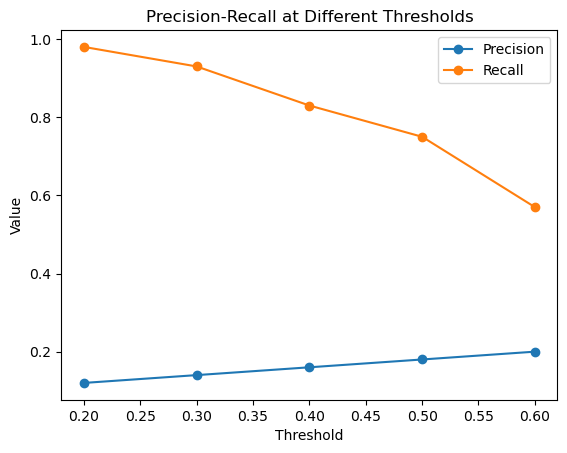

In [3]:
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]
precision = [0.12, 0.14, 0.16, 0.18, 0.20]
recall = [0.98, 0.93, 0.83, 0.75, 0.57]

# Plot precision
plt.plot(thresholds, precision, marker='o', label='Precision')

# Plot recall
plt.plot(thresholds, recall, marker='o', label='Recall')

# Set labels and title
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Precision-Recall at Different Thresholds')

# Show legend
plt.legend()

# Show the plot
plt.show()

From the curve, since we are focusing on a balance between precision and recall while ensuring a decent recall for class 1 (positive class) , a threshold around 0.4 might be a reasonable choice. At this threshold, there is a trade-off between false positives and false negatives, providing a relatively balanced precision-recall trade-off. This threshold prioritizes catching more positive cases.

Now , we will plot ROC-AUC curve to evaluates the ability of the model to discriminate between positive and negative classes across different thresholds:

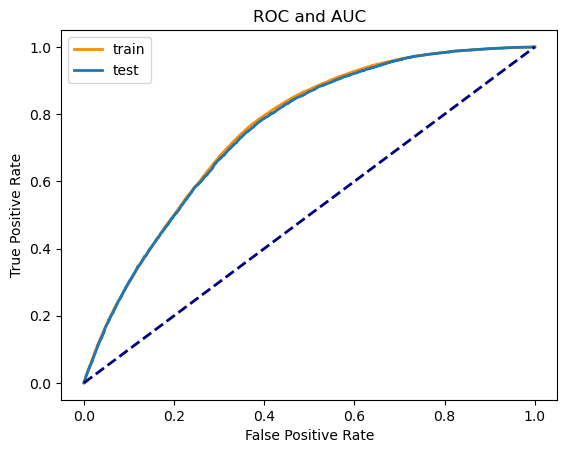

Test AUC score: 0.751075359760224
Train AUC score: 0.7546181005659199


In [40]:
#Get the probability for each point in the train set.
y_proba_train = logreg_without_pca.predict_proba(X_train)[:,1]

# Calculate ROC curve and AUC for for the train set
fprs_train, tprs_train, thresholds_train = roc_curve(y_train, y_proba_train)
roc_auc_train = roc_auc_score(y_train, y_proba_train)

# Calculate ROC curve and AUC for the test set
fprs_test, tprs_test, thresholds_test = roc_curve(y_test, probabilities)
roc_auc_test = roc_auc_score(y_test, probabilities)
  
# Plot the ROC curve.
plt.figure()
plt.plot(fprs_train, tprs_train, color='darkorange', lw=2, label='train')
plt.plot(fprs_test, tprs_test, lw=2, label='test')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.legend(loc="best")
plt.show()
print(f"Test AUC score: {roc_auc_test}")
print(f"Train AUC score: {roc_auc_train}")

AUC (Area Under the Curve) scores of around 0.75 for both the training and test sets indicate good performance in distinguishing between classes. The AUC measures the ability of the model to differentiate between positive and negative classes, with a score closer to 1.0 representing better discrimination. In this case, the model appears to generalize well to unseen data, as the AUC score on the test set is similar to that of the training set.


Then , we will evaluate logreg_pca model:

In [148]:
y_pred_pca = logreg_pca.predict(X_test_pca)

# Construct the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_pca)

# Add totals for rows and columns
conf_df = pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
conf_df.loc['Sum of Actuals'] = conf_df.sum()
conf_df['Sum of Predictions'] = conf_df.sum(axis=1)

# Display the confusion matrix
print(conf_df)

                Predicted 0  Predicted 1  Sum of Predictions
Actual 0              51322        27946               79268
Actual 1               2316         6154                8470
Sum of Actuals        53638        34100               87738


**Findings:**

- For class 0 (Actual 0): 51,322 were correctly predicted, but 27,946 were falsely predicted as class 1.
- For class 1 (Actual 1): 6,154 were correctly predicted, but 2,316 were falsely predicted as class 0.

Now , we will check precision and recall at different thresholds:

In [169]:
# Get predicted probabilities for the positive class

probabilities_pca = logreg_pca.predict_proba(X_test_pca)[:, 1]

# Define a list of thresholds to test
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]  

# Iterate through thresholds and print classification report for each
for threshold in thresholds:
    y_pred_threshold = (probabilities_pca >= threshold).astype(int)  # Convert probabilities to binary predictions
    print(f"Threshold: {threshold}")
    print(classification_report(y_test, y_pred_threshold))
    print("\n" + "="*40 + "\n")  # Add a line break between classification reports


Threshold: 0.2
              precision    recall  f1-score   support

           0       0.99      0.17      0.29     79268
           1       0.11      0.98      0.20      8470

    accuracy                           0.25     87738
   macro avg       0.55      0.58      0.25     87738
weighted avg       0.91      0.25      0.28     87738



Threshold: 0.3
              precision    recall  f1-score   support

           0       0.98      0.36      0.52     79268
           1       0.13      0.93      0.23      8470

    accuracy                           0.41     87738
   macro avg       0.56      0.65      0.38     87738
weighted avg       0.90      0.41      0.50     87738



Threshold: 0.4
              precision    recall  f1-score   support

           0       0.97      0.52      0.68     79268
           1       0.16      0.85      0.27      8470

    accuracy                           0.56     87738
   macro avg       0.56      0.68      0.47     87738
weighted avg       0.89  

**Findings:**

At Threshold 0.2, Precision (Class 1) is Very low at 0.11. Among all predicted positive cases, only 11% were actually positive.
Recall (Class 1) is Very high at 0.98. 98% of actual positive cases were identified.For ,F1-Score (Class 1), it is fairly low at 0.20. It represents a balance between precision and recall.The accuracy is 25% due to the highly imbalanced dataset.

At Threshold 0.3, Precision (Class 1) still low at 0.13 but slightly improved from the previous threshold.Recall (Class 1)is very high at 0.93. Similar to threshold 0.2.For F1-Score (Class 1), it is slightly improved but remains relatively low at 0.23.
The accuracy increased to 41%.

At threshold 0.4 , Precision (Class 1) improved to 0.16.Recall (Class 1) still high at 0.85, indicating it correctly identifies positive cases more often.For F1-Score (Class 1), it is improved but relatively low at 0.27. The accuracy increased to 56%.

At threshold 0.5 ,Precision (Class 1) still low at 0.18.Recall (Class 1) is 73% of actual positive cases were identified. For
F1-Score (Class 1) it is 0.29, indicating a slight improvement.The accuracy improved to 66%.

At threshold 0.6, Precision (Class 1)is 0.20, slightly better.Recall (Class 1) decreased to 0.55 but still higher than at lower thresholds.For F1-Score (Class 1), it is 0.29, similar to the previous threshold.The accuracy: Increased to 75%.

Now , we will plot a precision-recall curve to oberve them at different thresholds for class 1:

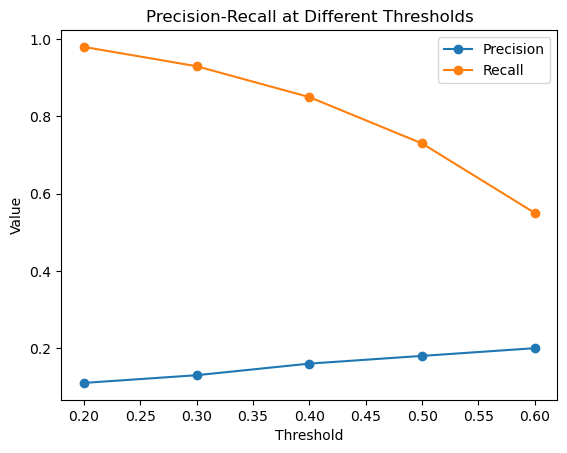

In [4]:
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]
precision = [0.11, 0.13, 0.16, 0.18, 0.20]
recall = [0.98, 0.93, 0.85, 0.73, 0.55]

# Plot precision
plt.plot(thresholds, precision, marker='o', label='Precision')

# Plot recall
plt.plot(thresholds, recall, marker='o', label='Recall')

# Set labels and title
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Precision-Recall at Different Thresholds')

# Show legend
plt.legend()

# Show the plot
plt.show()

From the curve above ,  a threshold between 0.4-0.5 provides a balanced precision-recall trade-off, with a relatively higher recall(0.73) while maintaining a reasonable precision (0.18).

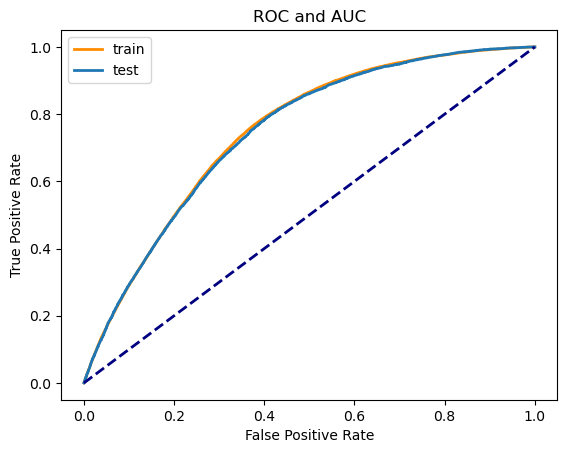

Test AUC score: 0.7454491097973852
Train AUC score: 0.7485001923736877


In [171]:
#Get the probability for each point in the train set.
y_proba_train = logreg_pca.predict_proba(X_train_pca)[:,1]

# Calculate ROC curve and AUC for for the train set
fprs_train, tprs_train, thresholds_train = roc_curve(y_train, y_proba_train)
roc_auc_train = roc_auc_score(y_train, y_proba_train)

# Calculate ROC curve and AUC for the test set
fprs_test, tprs_test, thresholds_test = roc_curve(y_test, probabilities_pca)
roc_auc_test = roc_auc_score(y_test, probabilities_pca)
  
# Plot the ROC curve.
plt.figure()
plt.plot(fprs_train, tprs_train, color='darkorange', lw=2, label='train')
plt.plot(fprs_test, tprs_test, lw=2, label='test')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.legend(loc="best")
plt.show()
print(f"Test AUC score: {roc_auc_test}")
print(f"Train AUC score: {roc_auc_train}")

Both scores are relatively close to each other, suggesting that the model performs similarly on both the training and test sets. This indicates that the model generalizes well and doesn't overfit the training data.

**Summary:**

- **Recall at Threshold 0.5:**
The model without PCA exhibits slightly higher recall by 2%.

- **Accuracy at Threshold 0.5:**
Both models show similar accuracy, with the PCA model slightly edging ahead.

- **AUC (Test):**
The model without PCA has a slightly higher AUC, indicating better overall performance in distinguishing classes.

- **Balance Between Precision and Recall:**
Both models maintain a similar balance between precision and recall, favoring recall while having a relatively low precision.

### Model 3.2: Random Forest Classifier<a id="Random-Forest-Classifier"></a>

We will fit 'rf' model on the original dataset:

In [151]:
rf = RandomForestClassifier(class_weight='balanced',random_state=42)
rf.fit(X_train, y_train)

# Evaluate your model
accuracy_train = rf.score(X_train, y_train)
accuracy_test = rf.score(X_test, y_test)

print(f"Train Accuracy: {accuracy_train}")
print(f"Test Accuracy: {accuracy_test}")

Train Accuracy: 0.8107604458729399
Test Accuracy: 0.755704483804053


We will fit 'rf_pca' model on the PCA-transformed dataste:

In [31]:
rf_pca = RandomForestClassifier(class_weight='balanced',random_state=42)
rf_pca.fit(X_train_pca, y_train)

# Evaluate your model
accuracy_train = rf_pca.score(X_train_pca, y_train)
accuracy_test = rf_pca.score(X_test_pca, y_test)

print(f"Train Accuracy with pca: {accuracy_train}")
print(f"Test Accuracy with pca: {accuracy_test}")

Train Accuracy with pca: 0.8108259819006588
Test Accuracy with pca: 0.7578130342610956


The results of both models suggest that while PCA didn't lead to a dramatic improvement in accuracy, it did help maintain or slightly enhance the model's performance by reducing the dimensionality of the feature space. This can be beneficial for computational efficiency or interpretability.

We will use a GridSearchCV, to find the best hyperparameters as the following :

In [62]:
# Define the parameters you want to search through
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid, cv=5, scoring='recall')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model (assigned to rf)
best_params = grid_search.best_params_
rf = grid_search.best_estimator_

# Use the best model for prediction on both training and test sets
train_predictions = rf.predict(X_train)
test_predictions = rf.predict(X_test)

# Calculate the recall on the training and test data using the best model (assigned to rf)
train_recall = recall_score(y_train, train_predictions)
test_recall = recall_score(y_test, test_predictions)

# Print the best parameters and recall scores
print(f"Best Parameters: {best_params}")
print(f"Recall on Training Set: {train_recall}")
print(f"Recall on Test Set: {test_recall}")

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Recall on Training Set: 0.7643082735617934
Recall on Test Set: 0.7574970484061393


Now , we will add the best parameters to our 'rf' model :

In [33]:
rf = RandomForestClassifier(class_weight='balanced', max_depth= 5, min_samples_leaf=1, min_samples_split= 2, n_estimators= 200,random_state=42)
rf.fit(X_train, y_train)

# Evaluate your model
accuracy_train = rf.score(X_train, y_train)
accuracy_test = rf.score(X_test, y_test)

print(f"Train Accuracy without pca: {accuracy_train}")
print(f"Test Accuracy without pca: {accuracy_test}")

Train Accuracy without pca: 0.6458404568146071
Test Accuracy without pca: 0.6454671863958604


Then , we will add the best parameters to 'rf_pca' model :

In [64]:
rf_pca = RandomForestClassifier(class_weight='balanced', max_depth= 5, min_samples_leaf=1, min_samples_split= 2, n_estimators= 200,random_state=42)
rf_pca.fit(X_train_pca, y_train)

# Evaluate your model
accuracy_train = rf_pca.score(X_train_pca, y_train)
accuracy_test = rf_pca.score(X_test_pca, y_test)

print(f"Train Accuracy with pca: {accuracy_train}")
print(f"Test Accuracy with pca: {accuracy_test}")

Train Accuracy with pca: 0.6073964530762042
Test Accuracy with pca: 0.6057808475233081


The model without PCA seems to have a higher accuracy on both the training and test sets. For the model with PCA, the accuracy drops on both the training and test sets, compared to the model without PCA.

We will calculate the recall for train and test sets for rf_pca:

In [72]:
# Predictions on training data
train_predictions = rf_pca.predict(X_train_pca)

# Predictions on test data
test_predictions = rf_pca.predict(X_test_pca)

# Calculate recall on training data
train_recall = recall_score(y_train, train_predictions)

# Calculate recall on test data
test_recall = recall_score(y_test, test_predictions)

print("Recall on Training Set:", train_recall)
print("Recall on Test Set:", test_recall)

Recall on Training Set: 0.7810738215413678
Recall on Test Set: 0.769185360094451


The model with PCA preprocessing tend to have slightly higher recall scores on both the training and test sets compared to the models without PCA. Therefore, based on these recall scores, the models with PCA preprocessing appear to perform slightly better in terms of recall on both the training and test sets.However, it is essential to consider other metrics alongside high recall scores.  Maintaining a balance between precision and recall while considering other pertinent metrics is crucial for a comprehensive evaluation of model performance.

**Random Forest Model Evaluation**

To evaluate the 'rf' model : 

In [34]:
# Get predicted probabilities for the positive class
y_probs = rf.predict_proba(X_test)[:, 1]  # Assuming the positive class is index 1

# Define a list of thresholds to test
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]  

# Iterate through thresholds and print classification report for each
for threshold in thresholds:
    y_pred_threshold = (y_probs >= threshold).astype(int)  # Convert probabilities to binary predictions
    print(f"Threshold: {threshold}")
    print(classification_report(y_test, y_pred_threshold))
    print("\n" + "="*40 + "\n")  # Add a line break between classification reports


Threshold: 0.2
              precision    recall  f1-score   support

           0       0.99      0.08      0.15     79268
           1       0.10      0.99      0.19      8470

    accuracy                           0.17     87738
   macro avg       0.55      0.54      0.17     87738
weighted avg       0.91      0.17      0.15     87738



Threshold: 0.3
              precision    recall  f1-score   support

           0       0.99      0.27      0.43     79268
           1       0.12      0.96      0.22      8470

    accuracy                           0.34     87738
   macro avg       0.55      0.62      0.32     87738
weighted avg       0.90      0.34      0.41     87738



Threshold: 0.4
              precision    recall  f1-score   support

           0       0.97      0.48      0.64     79268
           1       0.15      0.87      0.26      8470

    accuracy                           0.52     87738
   macro avg       0.56      0.67      0.45     87738
weighted avg       0.89  

**Findings:**

- Threshold: 0.2

Precision for Class 1 (Positive Cases): 0.10. Recall for Class 1: 0.99. Low precision indicates a high rate of false positives, while high recall indicates the model captures a significant portion of actual positive cases.

- Threshold: 0.3

Precision for Class 1 (Positive Cases): 0.12. Recall for Class 1: 0.96. Slight improvement in precision while maintaining a reasonable recall.

- Threshold: 0.4

Precision for Class 1 (Positive Cases): 0.16. Recall for Class 1: 0.48. Another increase in precision, but recall decreases as a trade-off.

- Threshold: 0.5

Precision for Class 1 (Positive Cases): 0.18. Recall for Class 1: 0.75. Increment in precision while maintaining a moderate recall. There's a trade-off between precision and recall, trying to balance both measures.

- Threshold: 0.6

Precision for Class 1 (Positive Cases): 0.20. Recall for Class 1: 0.54. Continued increase in precision but with a noticeable decline in recall.

Now , we will generate an interactive plot showing how precision and recall vary across thresholds for class 1 :

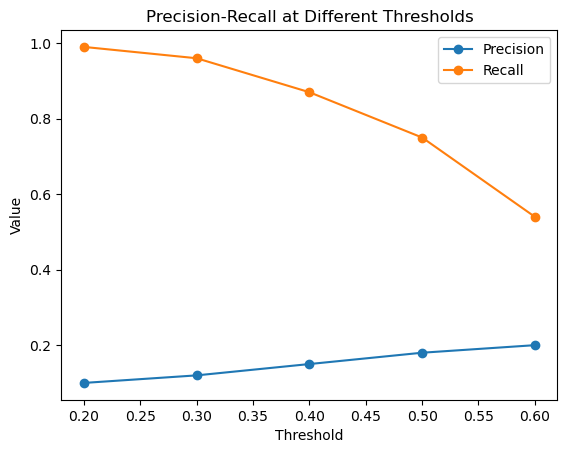

In [5]:

thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]
precision = [0.10, 0.12, 0.15, 0.18, 0.20]
recall = [0.99, 0.96, 0.87, 0.75, 0.54]

# Plot precision
plt.plot(thresholds, precision, marker='o', label='Precision')

# Plot recall
plt.plot(thresholds, recall, marker='o', label='Recall')

# Set labels and title
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Precision-Recall at Different Thresholds')

# Show legend
plt.legend()

# Show the plot
plt.show()

The high recall is critical,so we choose a threshold that maximizes recall while keeping an acceptable level of precision. Also , the point on the curve that maximizes the F1 score could indicate a good balance between precision and recall.For this reason, considering a balance between recall and precision, the threshold of 0.5 might be a good choice as it balances both recall and precision metrics somewhat better compared to the other thresholds.

Now , we will plot ROC-AUC curve to evaluates the ability of the model to discriminate between positive and negative classes across different thresholds:

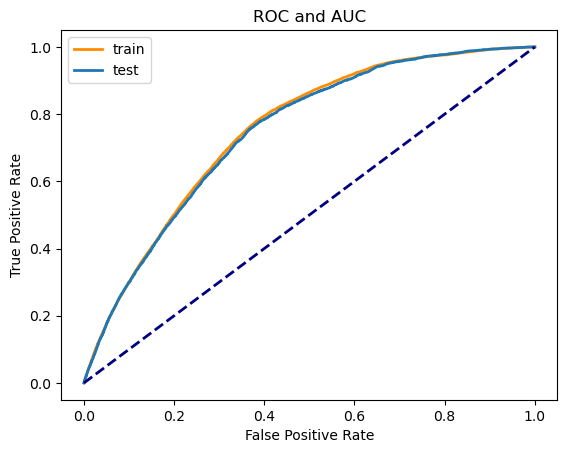

Test AUC score: 0.7463144539061337
Train AUC score: 0.7515003367120077


In [35]:
#Get the probability for each point in the train set.
y_proba_train1 = rf.predict_proba(X_train)[:,1]

# Calculate ROC curve and AUC for for the train set
fprs_train, tprs_train, thresholds_train = roc_curve(y_train, y_proba_train1)
roc_auc_train = roc_auc_score(y_train, y_proba_train1)

# Calculate ROC curve and AUC for the test set
fprs_test, tprs_test, thresholds_test = roc_curve(y_test, y_probs)
roc_auc_test = roc_auc_score(y_test, y_probs)
  
# Plot the ROC curve.
plt.figure()
plt.plot(fprs_train, tprs_train, color='darkorange', lw=2, label='train')
plt.plot(fprs_test, tprs_test, lw=2, label='test')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.legend(loc="best")
plt.show()
print(f"Test AUC score: {roc_auc_test}")
print(f"Train AUC score: {roc_auc_train}")

The AUC scores indicate the performance of the model in distinguishing between positive and negative cases across the train and test sets. With the test AUC at 0.746 and train AUC at 0.751, the model shows a consistent performance between the training and test datasets, suggesting a reliable ability to discriminate between classes.

To evaluate the 'rf_pca' model :

In [69]:
# Get predicted probabilities for the positive class
y_probs_pca = rf_pca.predict_proba(X_test_pca)[:, 1]  # Assuming the positive class is index 1

# Define a list of thresholds to test
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]  

# Iterate through thresholds and print classification report for each
for threshold in thresholds:
    y_pred_threshold = (y_probs_pca >= threshold).astype(int)  # Convert probabilities to binary predictions
    print(f"Threshold: {threshold}")
    print(classification_report(y_test, y_pred_threshold))
    print("\n" + "="*40 + "\n")  # Add a line break between classification reports


Threshold: 0.2
              precision    recall  f1-score   support

           0       0.99      0.04      0.07     79268
           1       0.10      1.00      0.18      8470

    accuracy                           0.13     87738
   macro avg       0.54      0.52      0.13     87738
weighted avg       0.90      0.13      0.08     87738



Threshold: 0.3
              precision    recall  f1-score   support

           0       0.98      0.28      0.43     79268
           1       0.12      0.96      0.22      8470

    accuracy                           0.34     87738
   macro avg       0.55      0.62      0.33     87738
weighted avg       0.90      0.34      0.41     87738



Threshold: 0.4
              precision    recall  f1-score   support

           0       0.97      0.45      0.61     79268
           1       0.14      0.87      0.25      8470

    accuracy                           0.49     87738
   macro avg       0.56      0.66      0.43     87738
weighted avg       0.89  

**Findings**

- Threshold: 0.2

At this threshold, the model identifies a higher proportion of actual positive cases (recall) compared to other thresholds. However, this comes at the cost of precision, resulting in a higher rate of false positives.

- Threshold: 0.3

The model slightly improves precision while maintaining a moderate recall compared to the previous threshold. It captures a reasonable number of actual positive cases while reducing false positives to some extent.


- Threshold: 0.4

Precision increases marginally, but the recall declines. The model becomes more conservative in predicting positive cases, resulting in fewer false positives but missing more actual positive cases.


- Threshold: 0.5

 At this threshold, precision improves slightly, but the recall drops further. Balanced precision and recall, attempting to strike a balance between both metrics.   


- Threshold: 0.6

With the highest threshold, precision continues to rise, but the recall declines significantly. The model makes very confident predictions for positive cases but captures a much smaller portion of actual positive instances.    


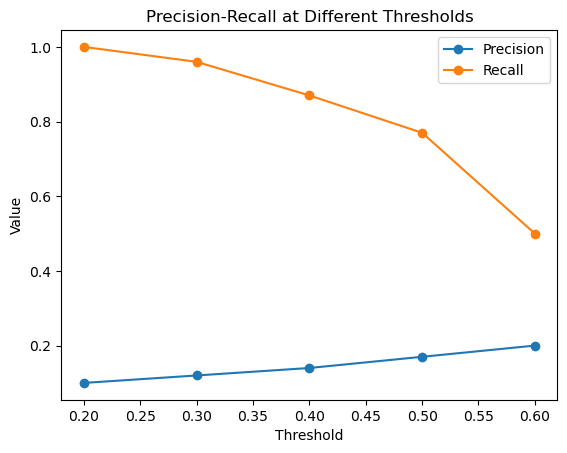

In [6]:
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]
precision = [0.10, 0.12, 0.14, 0.17, 0.20]
recall = [1, 0.96, 0.87, 0.77, 0.50]

# Plot precision
plt.plot(thresholds, precision, marker='o', label='Precision')

# Plot recall
plt.plot(thresholds, recall, marker='o', label='Recall')

# Set labels and title
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Precision-Recall at Different Thresholds')

# Show legend
plt.legend()

# Show the plot
plt.show()

From the curve , Threshold 0.5 provides a moderate balance between recall (0.77) and precision (0.17), aiming to minimize false negatives while reducing false positives to some extent.

Now , we will plot ROC-AUC curve to evaluates the ability of the model to discriminate between positive and negative classes across different thresholds:

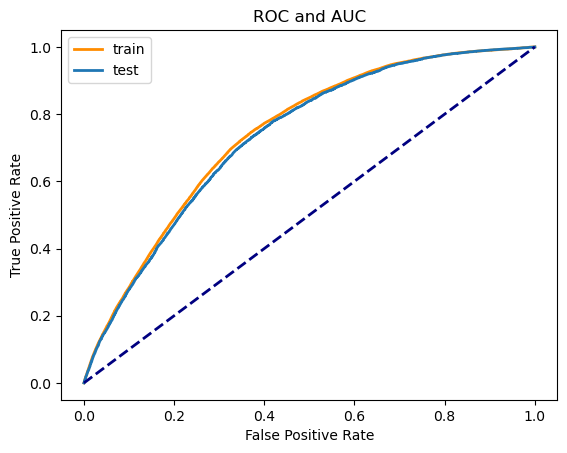

Test AUC score: 0.73364988210604
Train AUC score: 0.7418428281832227


In [71]:
#Get the probability for each point in the train set.
y_proba_train = rf_pca.predict_proba(X_train_pca)[:,1]

# Calculate ROC curve and AUC for for the train set
fprs_train, tprs_train, thresholds_train = roc_curve(y_train, y_proba_train)
roc_auc_train = roc_auc_score(y_train, y_proba_train)

# Calculate ROC curve and AUC for the test set
fprs_test, tprs_test, thresholds_test = roc_curve(y_test, y_probs_pca)
roc_auc_test = roc_auc_score(y_test, y_probs_pca)
  
# Plot the ROC curve.
plt.figure()
plt.plot(fprs_train, tprs_train, color='darkorange', lw=2, label='train')
plt.plot(fprs_test, tprs_test, lw=2, label='test')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.legend(loc="best")
plt.show()
print(f"Test AUC score: {roc_auc_test}")
print(f"Train AUC score: {roc_auc_train}")

The model without PCA seems to perform slightly better based on the AUC scores. It shows a slightly higher AUC score for both the train and test sets, indicating better overall performance in distinguishing between positive and negative cases.

**Summary :**

- **Recall:** The model with PCA has slightly higher recall scores on both the training and test sets compared to the model without PCA.

- **Accuracy:** The model without PCA exhibits higher accuracy on both the training and test sets compared to the model with PCA.

- **AUC**: Both models demonstrate very close AUC scores, indicating similar overall performance in distinguishing between positive and negative cases.

- **Balance between precision and recall**: The model without PCA, especially at a threshold of 0.5, seems to have a better balance between precision and recall. At this threshold, it shows relatively higher precision (0.18) and recall (0.75) for class 1 compared to the corresponding metrics of the model with PCA at the same threshold.In contrast, the model with PCA, while having higher recall, tends to have lower precision at the same threshold (0.17 precision for class 1 at a threshold of 0.5).

## Model 3.3: XGBoost Classifier<a id="XGBoost-Classifier"></a>

We will use 'scale_pos_weight' to address class imbalance in our target variable:

In [24]:

# Calculate the imbalance ratio
label_counts = Counter(y_train)
imbalance_ratio = label_counts[0] / label_counts[1]

# Set scale_pos_weight
scale_pos_weight = imbalance_ratio

Now we will create XGBoost classifier with our original dataset:

In [26]:

# XGBoost classifier with scale_pos_weight
xgb_classifier = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight)
# Train the XGBoost classifier
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
predictions = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy on Test Set:", accuracy)

# Predict on the training set
train_predictions = xgb_classifier.predict(X_train)

# Evaluate on the training set
train_accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy on Training Set:", train_accuracy)

Accuracy on Test Set: 0.6416262052930315
Accuracy on Training Set: 0.651026351181928


 We will create XGBoost classifier with our PCA transformed dataset:

In [30]:
# XGBoost classifier with scale_pos_weight
xgb_classifier_PCA = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight)
# Train the XGBoost classifier
xgb_classifier_PCA.fit(X_train_pca, y_train)

# Predict on the test set
predictions = xgb_classifier_PCA.predict(X_test_pca)

# Evaluate the model 
accuracy = accuracy_score(y_test, predictions)
print("Accuracy on Test Set:", accuracy)

# Predict on the training set
train_predictions = xgb_classifier_PCA.predict(X_train_pca)

# Evaluate on the training set
train_accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy on Training Set:", train_accuracy)

Accuracy on Test Set: 0.6543686885955914
Accuracy on Training Set: 0.674935603729285


The accuracy with PCA in both training and test sets is slightly higher compared to the model without PCA. Also , the accuracy difference between the test and training sets is minimal for both models, indicating reasonable generalization ability.Overall, models with PCA seem to have slightly better performance in correctly classifying instances in both seen and unseen data compared to models without PCA.

To find the best parameters for our XGBoost classifier:

In [31]:
# Define the parameter grid to search through
param_grid = {
    'learning_rate': [0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'scale_pos_weight': [scale_pos_weight]
}

# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Perform Grid Search to find the best parameters
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# Get the best parameters found by Grid Search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 9.35898344106969}


We will add the best parameters to the model with original dataset:

In [31]:

# XGBoost classifier without PCA
xgb_classifier = xgb.XGBClassifier(
    learning_rate=0.3,
    max_depth=3,
    n_estimators=100,
    scale_pos_weight=9.35898344106969
)
xgb_classifier.fit(X_train, y_train)

# Predictions and evaluation for model with original dataset
predictions = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print("Accuracy on Test Set:", accuracy)
print("Recall on Test Set :", recall)

train_predictions = xgb_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
train_recall = recall_score(y_train, train_predictions)
print("Accuracy on Training Set:", train_accuracy)
print("Recall on Training Set :", train_recall)

Accuracy on Test Set: 0.6335909184161936
Recall on Test Set : 0.7759149940968123
Accuracy on Training Set: 0.6355427522852128
Recall on Training Set : 0.7904306502553204


Then, We will add the best parameters to the model with PCA-transformed dataset:

In [36]:
# XGBoost classifier with PCA
xgb_classifier_PCA = xgb.XGBClassifier(
    learning_rate=0.3,
    max_depth=3,
    n_estimators=100,
    scale_pos_weight=9.35898344106969
)
xgb_classifier_PCA.fit(X_train_pca, y_train)

# Predictions and evaluation with PCA
predictions_pca = xgb_classifier_PCA.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, predictions_pca)
recall_pca = recall_score(y_test, predictions_pca)
print("Accuracy on Test Set (with PCA):", accuracy_pca)
print("Recall on Test Set (with PCA):", recall_pca)

train_predictions_pca = xgb_classifier_PCA.predict(X_train_pca)
train_accuracy_pca = accuracy_score(y_train, train_predictions_pca)
train_recall_pca = recall_score(y_train, train_predictions_pca)
print("Accuracy on Training Set (with PCA):", train_accuracy_pca)
print("Recall on Training Set (with PCA):", train_recall_pca)

Accuracy on Test Set (with PCA): 0.6397114135266361
Recall on Test Set (with PCA): 0.7565525383707202
Accuracy on Training Set (with PCA): 0.643723358180036
Recall on Training Set (with PCA): 0.7797750819091472


Both models (with and without PCA) show similar accuracy on the test set, with the PCA-transformed data slightly outperforming the non-transformed data. In terms of recall scores, The model without PCA has a higher recall on the test set (77.59%) compared to the PCA-transformed model (75.66%). Also, on the training set, the model without PCA has a slightly higher recall (79.04%) compared to the PCA-transformed model (77.98%).

**XGBoost Classifier Evaluation**

To evaluate the 'xgb_classifier' model :

In [32]:
# Get predicted probabilities for the positive class (class 1)
y_probs_xgb = xgb_classifier.predict_proba(X_test)[:, 1]

# Define a list of thresholds to test
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]

# Iterate through thresholds and print classification report for each
for threshold in thresholds:
    y_pred_threshold = (y_probs_xgb >= threshold).astype(int)  # Convert probabilities to binary predictions
    print(f"Threshold: {threshold}")
    print(classification_report(y_test, y_pred_threshold))
    print("\n" + "="*40 + "\n")  # Add a line break between classification reports

Threshold: 0.2
              precision    recall  f1-score   support

           0       0.99      0.30      0.46     79268
           1       0.13      0.97      0.23      8470

    accuracy                           0.36     87738
   macro avg       0.56      0.63      0.34     87738
weighted avg       0.90      0.36      0.43     87738



Threshold: 0.3
              precision    recall  f1-score   support

           0       0.98      0.40      0.57     79268
           1       0.14      0.93      0.25      8470

    accuracy                           0.45     87738
   macro avg       0.56      0.67      0.41     87738
weighted avg       0.90      0.45      0.54     87738



Threshold: 0.4
              precision    recall  f1-score   support

           0       0.97      0.52      0.68     79268
           1       0.16      0.86      0.27      8470

    accuracy                           0.55     87738
   macro avg       0.57      0.69      0.47     87738
weighted avg       0.89  

As the threshold increases, the precision for class 1 (cancer cases) improves while recall decreases. Lower thresholds prioritize recall at the cost of precision. A lower threshold (such as 0.2) yields high recall but sacrifices precision significantly, resulting in a lower overall accuracy. Conversely, a higher threshold (such as 0.6) improves precision but at the expense of recall. For this reason, the threshold of 0.5 seems to strike a reasonable balance between precision and recall, achieving a fair trade-off between these metrics while maintaining a decent level of accuracy.

Now , we will plot a precision-recall curve to observe them at different thresholds for class 1:

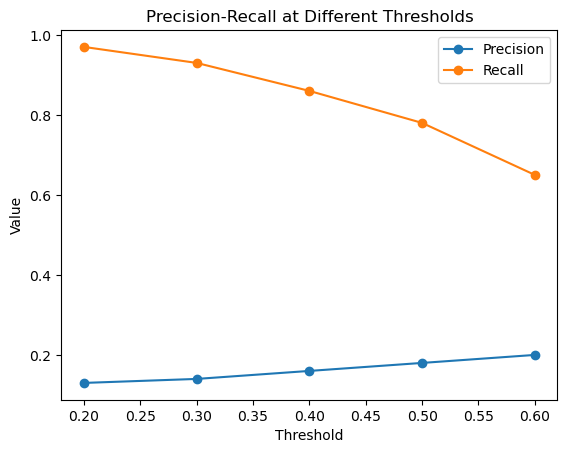

In [7]:
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]
precision = [0.13, 0.14, 0.16, 0.18, 0.20]
recall = [0.97, 0.93, 0.86, 0.78, 0.65]

# Plot precision
plt.plot(thresholds, precision, marker='o', label='Precision')

# Plot recall
plt.plot(thresholds, recall, marker='o', label='Recall')

# Set labels and title
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Precision-Recall at Different Thresholds')

# Show legend
plt.legend()

# Show the plot
plt.show()

From the line chart , we can observe a high recall, accompanied by an acceptable precision at threshold 0.5 for class 1. This suggests that the model is capturing most positive cases without overly misclassifying negative cases at this threshold.

Then , we will plot ROC-AUC curve to evaluates the ability of the model to discriminate between positive and negative classes across different thresholds:

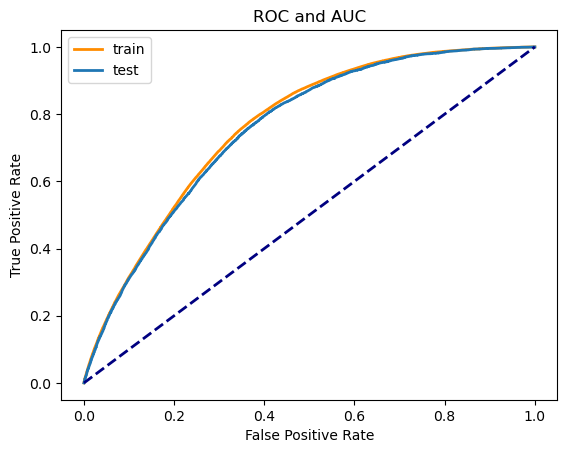

Test AUC score: 0.757264364448279
Train AUC score: 0.764953589940078


In [65]:
#Get the probability for each point in the train set.
y_proba_train2 = xgb_classifier.predict_proba(X_train)[:,1]

# Calculate ROC curve and AUC for for the train set
fprs_train, tprs_train, thresholds_train = roc_curve(y_train, y_proba_train2)
roc_auc_train = roc_auc_score(y_train, y_proba_train2)

# Calculate ROC curve and AUC for the test set
fprs_test, tprs_test, thresholds_test = roc_curve(y_test, y_probs_xgb)
roc_auc_test = roc_auc_score(y_test, y_probs_xgb)
  
# Plot the ROC curve.
plt.figure()
plt.plot(fprs_train, tprs_train, color='darkorange', lw=2, label='train')
plt.plot(fprs_test, tprs_test, lw=2, label='test')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.legend(loc="best")
plt.show()
print(f"Test AUC score: {roc_auc_test}")
print(f"Train AUC score: {roc_auc_train}")

Both the test and train AUC scores are relatively close, indicating that the model performs similarly on both sets. This suggests that the model's performance is consistent across seen and unseen data, reducing concerns about overfitting.

To evaluate the 'xgb_classifier_PCA' model :

In [39]:
# Get predicted probabilities for the positive class (class 1)
y_probs_xgb_pca = xgb_classifier_PCA.predict_proba(X_test_pca)[:, 1]

# Define a list of thresholds to test
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]

# Iterate through thresholds and print classification report for each
for threshold in thresholds:
    y_pred_threshold = (y_probs_xgb_pca >= threshold).astype(int)  # Convert probabilities to binary predictions
    print(f"Threshold: {threshold}")
    print(classification_report(y_test, y_pred_threshold))
    print("\n" + "="*40 + "\n")  # Add a line break between classification reports

Threshold: 0.2
              precision    recall  f1-score   support

           0       0.99      0.28      0.43     79268
           1       0.12      0.96      0.22      8470

    accuracy                           0.34     87738
   macro avg       0.56      0.62      0.33     87738
weighted avg       0.90      0.34      0.41     87738



Threshold: 0.3
              precision    recall  f1-score   support

           0       0.98      0.39      0.56     79268
           1       0.14      0.92      0.24      8470

    accuracy                           0.44     87738
   macro avg       0.56      0.66      0.40     87738
weighted avg       0.90      0.44      0.53     87738



Threshold: 0.4
              precision    recall  f1-score   support

           0       0.97      0.52      0.67     79268
           1       0.16      0.85      0.27      8470

    accuracy                           0.55     87738
   macro avg       0.56      0.68      0.47     87738
weighted avg       0.89  

The pattern is quite similar to XGBoost without PCA, with varying trade-offs between recall and precision across different thresholds.

**Summary Points:**

- Lowering the threshold increases recall but typically reduces precision, resulting in more false positives.
- Threshold 0.5 seems to strike a balance between recall and precision for XGBoost, where it captures a moderate proportion of positive cases while maintaining a reasonable precision.


Now , we will plot a precision-recall curve to observe them at different thresholds for class 1:

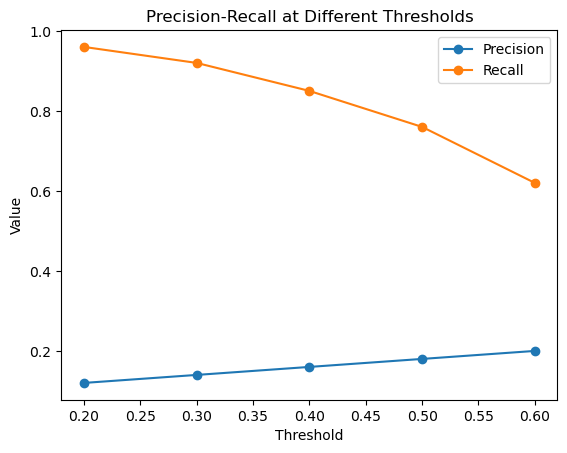

In [8]:
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]
precision = [0.12, 0.14, 0.16, 0.18, 0.20]
recall = [0.96, 0.92, 0.85, 0.76, 0.62]

# Plot precision
plt.plot(thresholds, precision, marker='o', label='Precision')

# Plot recall
plt.plot(thresholds, recall, marker='o', label='Recall')

# Set labels and title
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Precision-Recall at Different Thresholds')

# Show legend
plt.legend()

# Show the plot
plt.show()

In the line chart, we notice a notable pattern at threshold 0.5 for class 1, showcasing a substantial recall alongside an acceptable precision. This implies that the model adeptly captures a significant portion of actual positive cases without excessively misidentifying negative instances at this particular threshold.

Then , we will plot ROC-AUC curve to evaluates the ability of the model to discriminate between positive and negative classes across different thresholds:

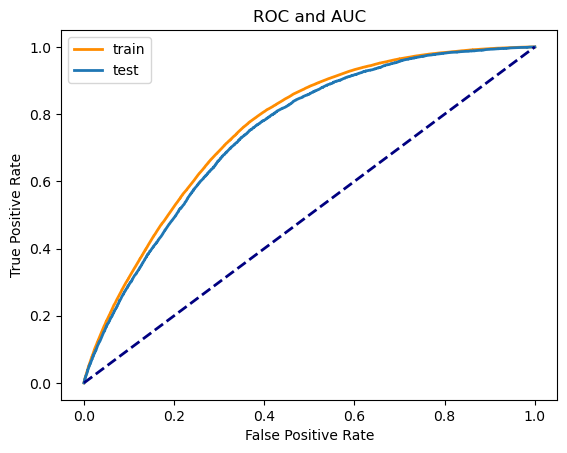

Test AUC score: 0.7474695373827547
Train AUC score: 0.7633471548828019


In [45]:
#Get the probability for each point in the train set.
y_proba_train = xgb_classifier_PCA.predict_proba(X_train_pca)[:,1]

# Calculate ROC curve and AUC for for the train set
fprs_train, tprs_train, thresholds_train = roc_curve(y_train, y_proba_train)
roc_auc_train = roc_auc_score(y_train, y_proba_train)

# Calculate ROC curve and AUC for the test set
fprs_test, tprs_test, thresholds_test = roc_curve(y_test, y_probs_xgb_pca)
roc_auc_test = roc_auc_score(y_test, y_probs_xgb_pca)
  
# Plot the ROC curve.
plt.figure()
plt.plot(fprs_train, tprs_train, color='darkorange', lw=2, label='train')
plt.plot(fprs_test, tprs_test, lw=2, label='test')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.legend(loc="best")
plt.show()
print(f"Test AUC score: {roc_auc_test}")
print(f"Train AUC score: {roc_auc_train}")

The AUC scores, 0.747 for the test dataset and 0.763 for the training dataset.These scores indicate the classifier's ability to discriminate between classes, suggesting moderate performance in distinguishing classes within the dataset transformed by PCA.

Overall , the model without PCA demonstrates slightly higher AUC scores for both the test and train sets compared to the model trained on PCA-transformed data. Generally, higher AUC values indicate better model performance in distinguishing between classes. 

## Model 3.4: Neural Network<a id="Neural-Network"></a>

We will calculate class weights based on the occurrence of each class within the training set to handle class imbalance :

In [23]:
# Count occurrences of each class in the training set
class_counter = Counter(y_train)
total_samples = len(y_train)

# Calculate class weights for the training set
class_weights = {cls: total_samples / (len(class_counter) * count) for cls, count in class_counter.items()}


We will fit 'NN_model' model on the original dataset:

In [24]:
# Create your neural network model
NN_model = Sequential()
# Add layers to the model

NN_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
NN_model.add(Dense(32, activation='relu'))
NN_model.add(Dense(1, activation='sigmoid'))

# Compile the model, specifying loss, optimizer, and metrics
NN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights using the entire training dataset
NN_model.fit(X_train, y_train, class_weight=class_weights, 
                       epochs=25, batch_size=32, verbose=1)

Epoch 1/25


10968/10968 [==============================] - 17s 1ms/step - loss: 0.5812 - accuracy: 0.6242
Epoch 2/25
10968/10968 [==============================] - 15s 1ms/step - loss: 0.5755 - accuracy: 0.6244
Epoch 3/25
10968/10968 [==============================] - 16s 1ms/step - loss: 0.5740 - accuracy: 0.6277
Epoch 4/25
10968/10968 [==============================] - 16s 1ms/step - loss: 0.5731 - accuracy: 0.6310
Epoch 5/25
10968/10968 [==============================] - 17s 2ms/step - loss: 0.5722 - accuracy: 0.6323
Epoch 6/25
10968/10968 [==============================] - 17s 2ms/step - loss: 0.5714 - accuracy: 0.6349
Epoch 7/25
10968/10968 [==============================] - 18s 2ms/step - loss: 0.5709 - accuracy: 0.6366
Epoch 8/25
10968/10968 [==============================] - 15s 1ms/step - loss: 0.5705 - accuracy: 0.6376
Epoch 9/25
10968/10968 [==============================] - 16s 1ms/step - loss: 0.5700 - accuracy: 0.6347
Epoch 10/25
10968/10968 [============================

**NN_model Evaluation**

To evaluate the accuracy of 'NN_model' model on the train and test sets:

In [37]:
# Evaluate model on training data
train_loss, train_accuracy = NN_model.evaluate(X_train, y_train, verbose=1)
print(f"Training Accuracy: {train_accuracy}")

# Evaluate model on test data
test_loss, test_accuracy = NN_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy}")

10968/10968 [==============================] - 13s 1ms/step - loss: 0.6094 - accuracy: 0.6229
Training Accuracy: 0.6229000091552734
2742/2742 [==============================] - 3s 1ms/step - loss: 0.6179 - accuracy: 0.6189
Test Accuracy: 0.6189450621604919


we observe a similar performance between the training and test sets. The slight difference between training and test accuracies might suggest a small degree of overfitting.

To evaluate the 'NN_model' model :

In [66]:
# Get predicted probabilities for the positive class
y_probs_NN = NN_model.predict(X_test)

# Define a list of thresholds to test
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]

# Iterate through thresholds and print classification report for each
for threshold in thresholds:
    y_pred_threshold = (y_probs_NN >= threshold).astype(int)  # Convert probabilities to binary predictions
    print(f"Threshold: {threshold}")
    print(classification_report(y_test, y_pred_threshold))
    print("\n" + "="*40 + "\n")  # Add a line break between classification reports

2742/2742 [==============================] - 3s 947us/step
Threshold: 0.2
              precision    recall  f1-score   support

           0       0.99      0.28      0.43     79268
           1       0.13      0.97      0.22      8470

    accuracy                           0.34     87738
   macro avg       0.56      0.62      0.33     87738
weighted avg       0.90      0.34      0.41     87738



Threshold: 0.3
              precision    recall  f1-score   support

           0       0.98      0.38      0.55     79268
           1       0.14      0.93      0.24      8470

    accuracy                           0.43     87738
   macro avg       0.56      0.66      0.39     87738
weighted avg       0.90      0.43      0.52     87738



Threshold: 0.4
              precision    recall  f1-score   support

           0       0.97      0.51      0.67     79268
           1       0.16      0.86      0.27      8470

    accuracy                           0.54     87738
   macro avg       0

Now , we will plot a precision-recall curve to observe them at different thresholds for class 1:

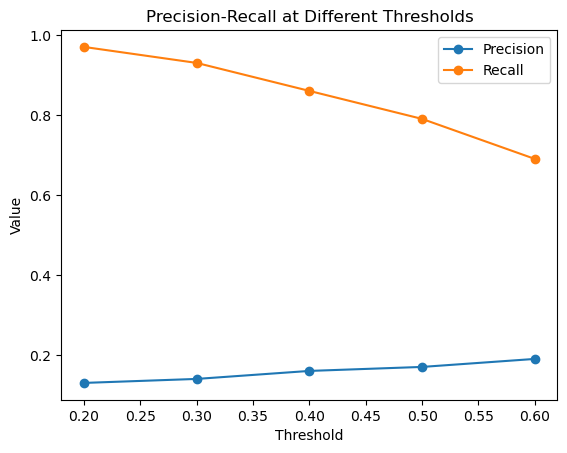

In [9]:
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]
precision = [0.13, 0.14, 0.16, 0.17, 0.19]
recall = [0.97, 0.93, 0.86, 0.79, 0.69]

# Plot precision
plt.plot(thresholds, precision, marker='o', label='Precision')

# Plot recall
plt.plot(thresholds, recall, marker='o', label='Recall')

# Set labels and title
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Precision-Recall at Different Thresholds')

# Show legend
plt.legend()

# Show the plot
plt.show()

**Classification Report and Line Chart Results Interpretation:**

- Across these thresholds, the model consistently demonstrates notable recall for Class 1, ranging from 79% to 97%.
- Thresholds around 0.4 and 0.5 strike a balance between recall and precision, leaning slightly towards recall for Class 1.

Then , we will plot ROC-AUC curve to evaluates the ability of the model to discriminate between positive and negative classes across different thresholds:

10968/10968 [==============================] - 12s 1ms/step


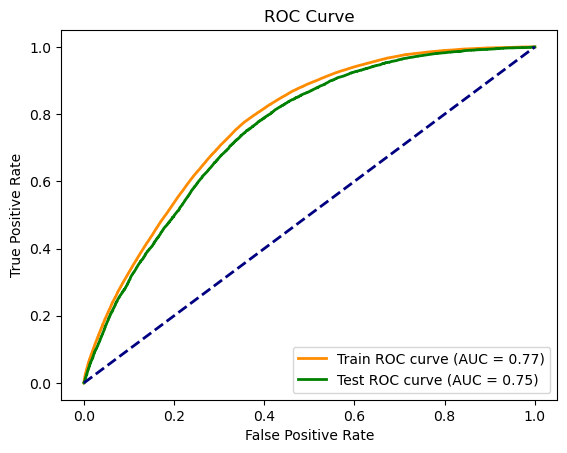

Test AUC score: 0.7531962006670361
Train AUC score: 0.772577789280949


In [67]:
#Get the probability for each point in the train set.
y_probs_train3 = NN_model.predict(X_train)

# Calculate ROC curve and AUC for the train set
fprs_train, tprs_train, thresholds_train = roc_curve(y_train, y_probs_train3)
roc_auc_train = roc_auc_score(y_train, y_probs_train3)

# Calculate ROC curve and AUC for the test set
fprs_test, tprs_test, thresholds_test = roc_curve(y_test, y_probs_NN)
roc_auc_test = roc_auc_score(y_test, y_probs_NN)

# Plot the ROC curve
plt.figure()
plt.plot(fprs_train, tprs_train, color='darkorange', lw=2, label='Train ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot(fprs_test, tprs_test, color='green', lw=2, label='Test ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Test AUC score: {roc_auc_test}")
print(f"Train AUC score: {roc_auc_train}")

The test AUC score of 0.753 suggests that, on unseen data, the model's ability to differentiate between classes is moderately good. The train AUC score of 0.773 indicates that the model performs well on the training dataset. Overall, an AUC score of 0.753 demonstrates that the model is good in class separation and performs reasonably well in distinguishing between classes on new, unseen data.

Now , we will fit 'NN_model_pca' model on the PCA-transformed dataset:

In [44]:
# Create your neural network model with PCA-transformed dataset
NN_model_pca = Sequential()
# Add layers to the model

NN_model_pca.add(Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)))
NN_model_pca.add(Dense(32, activation='relu'))
NN_model_pca.add(Dense(1, activation='sigmoid'))

# Compile the model, specifying loss, optimizer, and metrics
NN_model_pca.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights using the entire training dataset
NN_model_pca.fit(X_train_pca, y_train, class_weight=class_weights, 
                       epochs=25, batch_size=32, verbose=1)

Epoch 1/25
10968/10968 [==============================] - 39s 3ms/step - loss: 0.5832 - accuracy: 0.6266
Epoch 2/25
10968/10968 [==============================] - 37s 3ms/step - loss: 0.5779 - accuracy: 0.6274
Epoch 3/25
10968/10968 [==============================] - 36s 3ms/step - loss: 0.5760 - accuracy: 0.6269
Epoch 4/25
10968/10968 [==============================] - 36s 3ms/step - loss: 0.5750 - accuracy: 0.6270
Epoch 5/25
10968/10968 [==============================] - 36s 3ms/step - loss: 0.5742 - accuracy: 0.6291
Epoch 6/25
10968/10968 [==============================] - 37s 3ms/step - loss: 0.5738 - accuracy: 0.6271
Epoch 7/25
10968/10968 [==============================] - 37s 3ms/step - loss: 0.5731 - accuracy: 0.6303
Epoch 8/25
10968/10968 [==============================] - 36s 3ms/step - loss: 0.5727 - accuracy: 0.6303
Epoch 9/25
10968/10968 [==============================] - 36s 3ms/step - loss: 0.5722 - accuracy: 0.6317
Epoch 10/25
10968/10968 [==============================

**NN_model_pca Evaluation**

To evaluate the accuracy of 'NN_model_pca' model on the train and test sets:

In [45]:
# Evaluate model on training data
train_loss, train_accuracy = NN_model_pca.evaluate(X_train_pca, y_train, verbose=1)
print(f"Training Accuracy: {train_accuracy}")

# Evaluate model on test data
test_loss, test_accuracy = NN_model_pca.evaluate(X_test_pca, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy}")

10968/10968 [==============================] - 29s 3ms/step - loss: 0.5884 - accuracy: 0.6364
Training Accuracy: 0.6363975405693054
2742/2742 [==============================] - 7s 3ms/step - loss: 0.5954 - accuracy: 0.6319
Test Accuracy: 0.631869912147522


The models without PCA and with PCA exhibit similar performances on the test set, with accuracies 61% and 63%. The addition of PCA doesn't notably improve the model's predictive performance in terms of accuracy in this scenario. The differences in accuracy between the models are subtle and might not significantly impact their practical utility.

To evaluate the 'NN_model_pca' model :

In [46]:
# Get predicted probabilities for the positive class
y_probs = NN_model_pca.predict(X_test_pca)

# Define a list of thresholds to test
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]

# Iterate through thresholds and print classification report for each
for threshold in thresholds:
    y_pred_threshold = (y_probs >= threshold).astype(int)  # Convert probabilities to binary predictions
    print(f"Threshold: {threshold}")
    print(classification_report(y_test, y_pred_threshold))
    print("\n" + "="*40 + "\n")  # Add a line break between classification reports

2742/2742 [==============================] - 7s 2ms/step
Threshold: 0.2
              precision    recall  f1-score   support

           0       0.99      0.28      0.44     79268
           1       0.13      0.97      0.22      8470

    accuracy                           0.35     87738
   macro avg       0.56      0.63      0.33     87738
weighted avg       0.90      0.35      0.42     87738



Threshold: 0.3
              precision    recall  f1-score   support

           0       0.98      0.40      0.57     79268
           1       0.14      0.92      0.25      8470

    accuracy                           0.45     87738
   macro avg       0.56      0.66      0.41     87738
weighted avg       0.90      0.45      0.54     87738



Threshold: 0.4
              precision    recall  f1-score   support

           0       0.97      0.52      0.68     79268
           1       0.16      0.85      0.27      8470

    accuracy                           0.55     87738
   macro avg       0.5

We will plot a precision-recall curve to observe them at different thresholds:

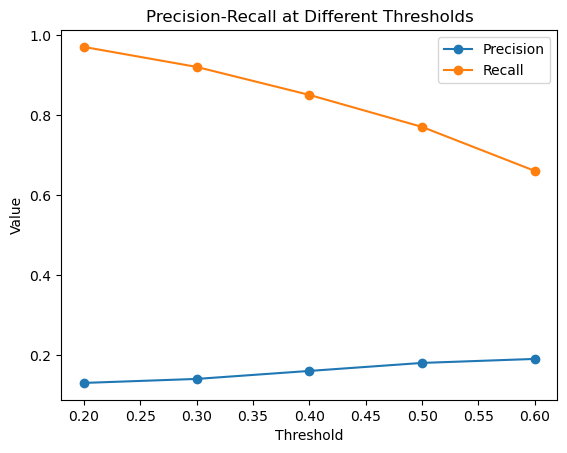

In [10]:
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]
precision = [0.13, 0.14, 0.16, 0.18, 0.19]
recall = [0.97, 0.92, 0.85, 0.77, 0.66]

# Plot precision
plt.plot(thresholds, precision, marker='o', label='Precision')

# Plot recall
plt.plot(thresholds, recall, marker='o', label='Recall')

# Set labels and title
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Precision-Recall at Different Thresholds')

# Show legend
plt.legend()

# Show the plot
plt.show()

**Classification Report and Line Chart Results Interpretation:**

- The model exhibits a trade-off between precision and recall across thresholds.
- Thresholds around 0.4 and 0.5 achieve a balanced trade-off between recall for Class 1 and precision for Class 0, with an accuracy of around 55-63%.
- When accurately capturing positive cases (high recall) is crucial and acceptable with some false positives, thresholds around 0.5 might be preferred. 

Now , we will plot ROC-AUC curve to evaluates the ability of the model to discriminate between positive and negative classes across different thresholds:

10968/10968 [==============================] - 26s 2ms/step


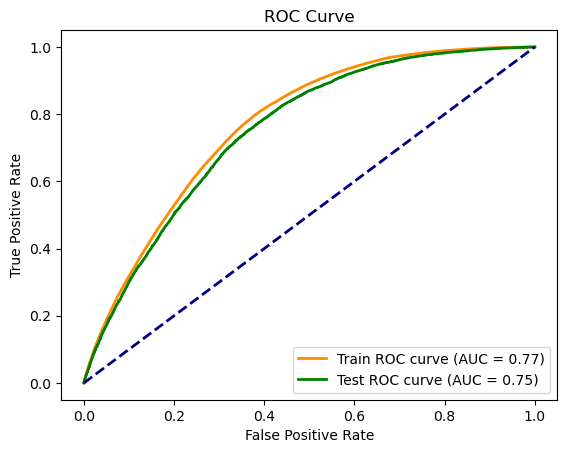

Test AUC score: 0.7520579603549575
Train AUC score: 0.7691606791948781


In [47]:
#Get the probability for each point in the train set.
y_probs_train = NN_model_pca.predict(X_train_pca)

# Calculate ROC curve and AUC for the train set
fprs_train, tprs_train, thresholds_train = roc_curve(y_train, y_probs_train)
roc_auc_train = roc_auc_score(y_train, y_probs_train)

# Calculate ROC curve and AUC for the test set
fprs_test, tprs_test, thresholds_test = roc_curve(y_test, y_probs)
roc_auc_test = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure()
plt.plot(fprs_train, tprs_train, color='darkorange', lw=2, label='Train ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot(fprs_test, tprs_test, color='green', lw=2, label='Test ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Test AUC score: {roc_auc_test}")
print(f"Train AUC score: {roc_auc_train}")

**Summary:**
- There's a marginal difference in performance between the models, with the model without PCA having slightly higher AUC scores in both test and train datasets.
- The AUC scores, which indicate the model's ability to distinguish between classes, are reasonably close, suggesting that the PCA inclusion did not significantly impact the model's ability to discriminate between classes.
- Considering a threshold of 0.5, the model without PCA demonstrates a marginally better balance between precision and recall for both classes.

## Part 4: Models Comparison<a id="Models-Comparison"></a>

In this section we will compare the performance of the four models:

To observe the PR-ROC Curve for XGBoost Model:

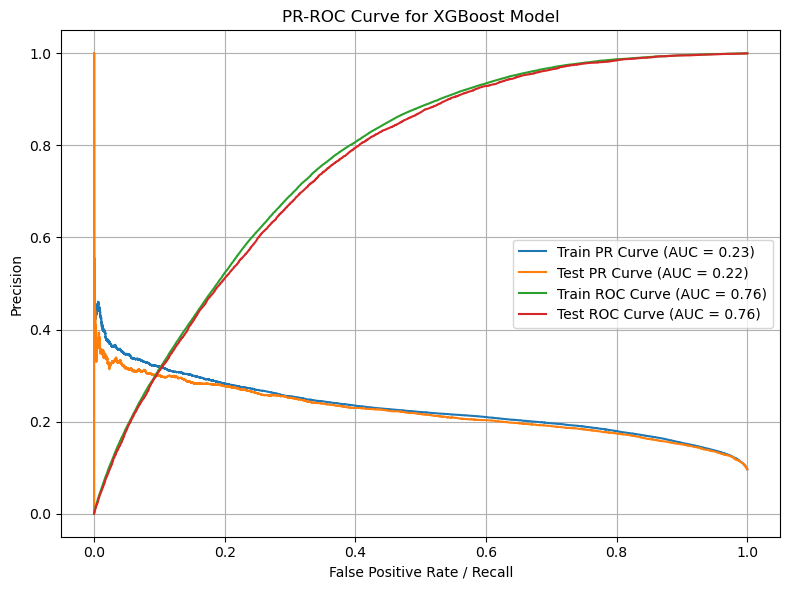

In [88]:
# Calculate Precision-Recall curve and AUC for train set
precision_train, recall_train, _ = precision_recall_curve(y_train, y_proba_train2)
pr_auc_train = auc(recall_train, precision_train)

# Calculate Precision-Recall curve and AUC for test set
precision_test, recall_test, _ = precision_recall_curve(y_test, y_probs_xgb)
pr_auc_test = auc(recall_test, precision_test)

# Calculate ROC curve and AUC for train set
fpr_train, tpr_train, _ = roc_curve(y_train, y_proba_train2)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate ROC curve and AUC for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_probs_xgb)
roc_auc_test = auc(fpr_test, tpr_test)

# Plotting PR-ROC curve
plt.figure(figsize=(8, 6))

# Plot PR curve for train set
plt.plot(recall_train, precision_train, label=f'Train PR Curve (AUC = {pr_auc_train:.2f})')

# Plot PR curve for test set
plt.plot(recall_test, precision_test, label=f'Test PR Curve (AUC = {pr_auc_test:.2f})')

# Plot ROC curve for train set
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {roc_auc_train:.2f})')

# Plot ROC curve for test set
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {roc_auc_test:.2f})')

plt.xlabel('False Positive Rate / Recall')
plt.ylabel('Precision')
plt.title('PR-ROC Curve for XGBoost Model')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [89]:
print("Train set:")
print(f"PR AUC: {pr_auc_train:.4f}")
print(f"ROC AUC: {roc_auc_train:.4f}")

print("\nTest set:")
print(f"PR AUC: {pr_auc_test:.4f}")
print(f"ROC AUC: {roc_auc_test:.4f}")

Train set:
PR AUC: 0.2308
ROC AUC: 0.7650

Test set:
PR AUC: 0.2222
ROC AUC: 0.7573


To observe the PR-ROC Curve for Neural Network Model:

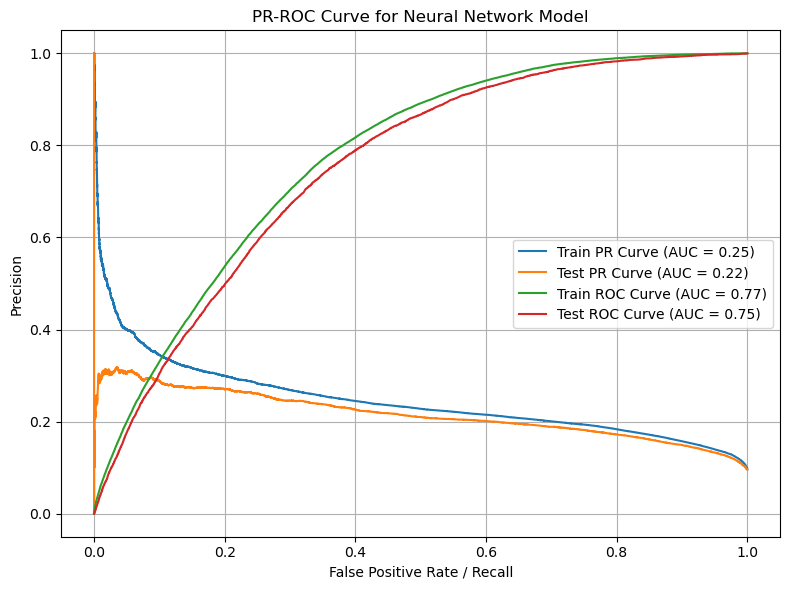

In [86]:
# Calculate Precision-Recall curve and AUC for train set
precision_train, recall_train, _ = precision_recall_curve(y_train, y_probs_train3)
pr_auc_train1 = auc(recall_train, precision_train)

# Calculate Precision-Recall curve and AUC for test set
precision_test, recall_test, _ = precision_recall_curve(y_test, y_probs_NN)
pr_auc_test1 = auc(recall_test, precision_test)

# Calculate ROC curve and AUC for train set
fpr_train, tpr_train, _ = roc_curve(y_train, y_probs_train3)
roc_auc_train1 = auc(fpr_train, tpr_train)

# Calculate ROC curve and AUC for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_probs_NN)
roc_auc_test1 = auc(fpr_test, tpr_test)

# Plotting PR-ROC curve
plt.figure(figsize=(8, 6))

# Plot PR curve for train set
plt.plot(recall_train, precision_train, label=f'Train PR Curve (AUC = {pr_auc_train1:.2f})')

# Plot PR curve for test set
plt.plot(recall_test, precision_test, label=f'Test PR Curve (AUC = {pr_auc_test1:.2f})')

# Plot ROC curve for train set
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {roc_auc_train1:.2f})')

# Plot ROC curve for test set
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {roc_auc_test1:.2f})')

plt.xlabel('False Positive Rate / Recall')
plt.ylabel('Precision')
plt.title('PR-ROC Curve for Neural Network Model')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [87]:
print("Train set:")
print(f"PR AUC: {pr_auc_train1:.4f}")
print(f"ROC AUC: {roc_auc_train1:.4f}")

print("\nTest set:")
print(f"PR AUC: {pr_auc_test1:.4f}")
print(f"ROC AUC: {roc_auc_test1:.4f}")

Train set:
PR AUC: 0.2468
ROC AUC: 0.7726

Test set:
PR AUC: 0.2159
ROC AUC: 0.7532


To observe the PR-ROC Curve for Logistic Regression:

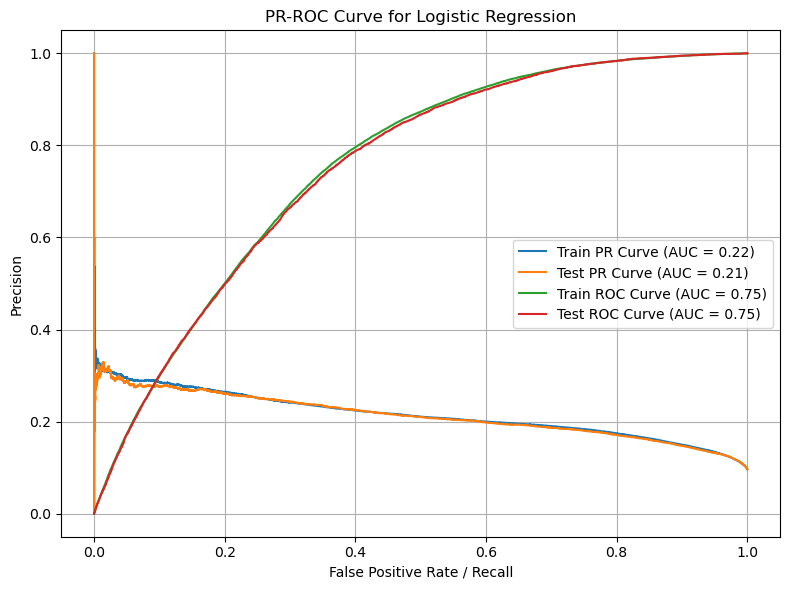

In [41]:
# Calculate Precision-Recall curve and AUC for train set
precision_train, recall_train, _ = precision_recall_curve(y_train, y_proba_train)
pr_auc_train2 = auc(recall_train, precision_train)

# Calculate Precision-Recall curve and AUC for test set
precision_test, recall_test, _ = precision_recall_curve(y_test, probabilities)
pr_auc_test2 = auc(recall_test, precision_test)

# Calculate ROC curve and AUC for train set
fpr_train, tpr_train, _ = roc_curve(y_train, y_proba_train)
roc_auc_train2 = auc(fpr_train, tpr_train)

# Calculate ROC curve and AUC for test set
fpr_test, tpr_test, _ = roc_curve(y_test, probabilities)
roc_auc_test2 = auc(fpr_test, tpr_test)

# Plotting PR-ROC curve
plt.figure(figsize=(8, 6))

# Plot PR curve for train set
plt.plot(recall_train, precision_train, label=f'Train PR Curve (AUC = {pr_auc_train2:.2f})')

# Plot PR curve for test set
plt.plot(recall_test, precision_test, label=f'Test PR Curve (AUC = {pr_auc_test2:.2f})')

# Plot ROC curve for train set
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {roc_auc_train2:.2f})')

# Plot ROC curve for test set
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {roc_auc_test2:.2f})')

plt.xlabel('False Positive Rate / Recall')
plt.ylabel('Precision')
plt.title('PR-ROC Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [42]:
print("Train set:")
print(f"PR AUC: {pr_auc_train2:.4f}")
print(f"ROC AUC: {roc_auc_train2:.4f}")

print("\nTest set:")
print(f"PR AUC: {pr_auc_test2:.4f}")
print(f"ROC AUC: {roc_auc_test2:.4f}")

Train set:
PR AUC: 0.2158
ROC AUC: 0.7546

Test set:
PR AUC: 0.2128
ROC AUC: 0.7511


To observe the PR-ROC Curve for Random Forest:

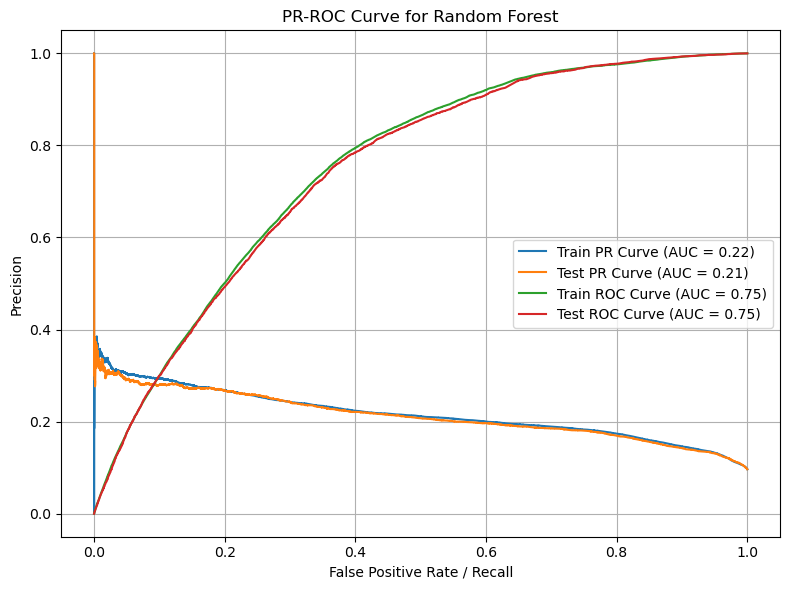

In [43]:
# Calculate Precision-Recall curve and AUC for train set
precision_train, recall_train, _ = precision_recall_curve(y_train, y_proba_train1)
pr_auc_train3 = auc(recall_train, precision_train)

# Calculate Precision-Recall curve and AUC for test set
precision_test, recall_test, _ = precision_recall_curve(y_test, y_probs)
pr_auc_test3 = auc(recall_test, precision_test)

# Calculate ROC curve and AUC for train set
fpr_train, tpr_train, _ = roc_curve(y_train, y_proba_train1)
roc_auc_train3 = auc(fpr_train, tpr_train)

# Calculate ROC curve and AUC for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_probs)
roc_auc_test3 = auc(fpr_test, tpr_test)

# Plotting PR-ROC curve
plt.figure(figsize=(8, 6))

# Plot PR curve for train set
plt.plot(recall_train, precision_train, label=f'Train PR Curve (AUC = {pr_auc_train3:.2f})')

# Plot PR curve for test set
plt.plot(recall_test, precision_test, label=f'Test PR Curve (AUC = {pr_auc_test3:.2f})')

# Plot ROC curve for train set
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {roc_auc_train3:.2f})')

# Plot ROC curve for test set
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {roc_auc_test3:.2f})')

plt.xlabel('False Positive Rate / Recall')
plt.ylabel('Precision')
plt.title('PR-ROC Curve for Random Forest')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [44]:
print("Train set:")
print(f"PR AUC: {pr_auc_train3:.4f}")
print(f"ROC AUC: {roc_auc_train3:.4f}")

print("\nTest set:")
print(f"PR AUC: {pr_auc_test3:.4f}")
print(f"ROC AUC: {roc_auc_test3:.4f}")

Train set:
PR AUC: 0.2169
ROC AUC: 0.7515

Test set:
PR AUC: 0.2129
ROC AUC: 0.7463


**Summary for the PR-ROC Curves of the four models:**

Among these models, the Neural Network performs slightly better on the training set compared to the others in terms of both PR AUC and ROC AUC. However, on the test set, the XGBoost model maintains a slightly higher PR AUC and ROC AUC than the others.So, based on the test set performance, the XGBoost model might be considered the best performing one among these models. It consistently shows a slightly better area under the precision-recall curve and the receiver operating characteristic curve on the test data compared to the other models.

To compare the recall and precision scores for the four models at different thresholds:

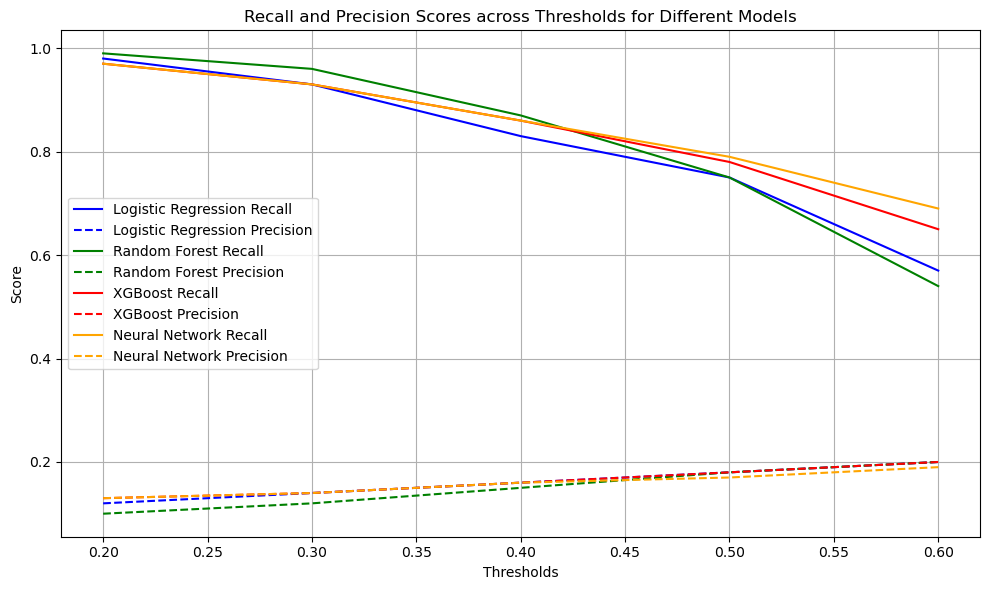

In [54]:

model_scores = {
    'Logistic Regression': {'thresholds': [0.2, 0.3, 0.4, 0.5,0.6], 'recall': [0.98, 0.93, 0.83, 0.75, 0.57], 'precision': [0.12, 0.14, 0.16, 0.18, 0.20]},
    'Random Forest': {'thresholds': [0.2, 0.3, 0.4, 0.5,0.6], 'recall': [0.99, 0.96, 0.87, 0.75, 0.54], 'precision': [0.10, 0.12, 0.15, 0.18, 0.20]},
    'XGBoost': {'thresholds': [0.2, 0.3, 0.4, 0.5,0.6], 'recall': [0.97, 0.93, 0.86, 0.78, 0.65], 'precision': [0.13, 0.14, 0.16, 0.18, 0.20]},
    'Neural Network': {'thresholds': [0.2, 0.3, 0.4, 0.5,0.6], 'recall': [0.97, 0.93, 0.86, 0.79, 0.69], 'precision': [0.13, 0.14, 0.16, 0.17, 0.19]}
}

# Plotting recall and precision scores across thresholds for each model
plt.figure(figsize=(10, 6))

colors = ['blue', 'green', 'red', 'orange']  

index = 0
for model, scores in model_scores.items():
    plt.plot(scores['thresholds'], scores['recall'], label=f'{model} Recall', color=colors[index])
    plt.plot(scores['thresholds'], scores['precision'], label=f'{model} Precision', linestyle='--', color=colors[index])
    index += 1

plt.title('Recall and Precision Scores across Thresholds for Different Models')
plt.xlabel('Thresholds')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Another line chart to observe the recall and precision scores at threshold 0.5:

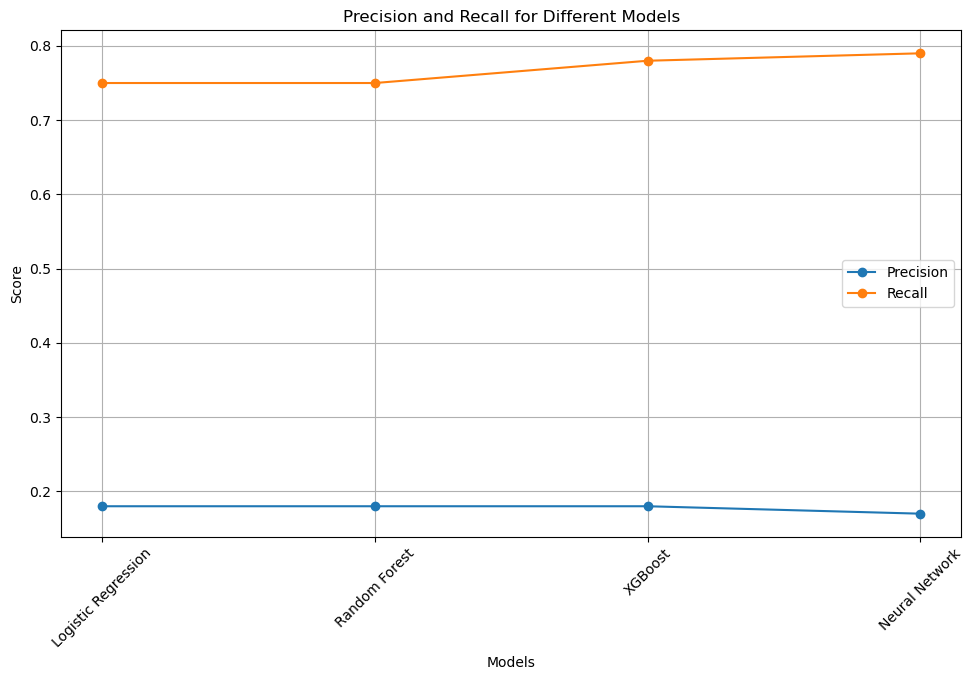

In [63]:
model_scores = {
    'Logistic Regression': {'threshold': [0.5], 'recall': [0.75], 'precision': [0.18]},
    'Random Forest': {'threshold': [0.5], 'recall': [0.75], 'precision': [0.18]},
    'XGBoost': {'threshold': [0.5], 'recall': [0.78], 'precision': [0.18]},
    'Neural Network': {'threshold': [0.5], 'recall': [0.79], 'precision': [0.17]}
}

models = list(model_scores.keys())
precisions = [model_scores[model]['precision'][0] for model in models]
recalls = [model_scores[model]['recall'][0] for model in models]

plt.figure(figsize=(10, 6))

# Plotting precision and recall for each model
plt.plot(models, precisions, label='Precision', marker='o')
plt.plot(models, recalls, label='Recall', marker='o')

plt.title('Precision and Recall for Different Models')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

From the line charts above, both the XGBoost and Neural Network models exhibit commendable recall scores of 0.79 and 0.78, respectively, at a threshold of 0.5. These scores signify their effectiveness in correctly capturing a significant portion of positive instances. Moreover, they maintain a balanced precision, measuring at 0.17 and 0.18, respectively. This balance suggests that they limit misclassifying negative cases while successfully identifying positive ones, reflecting their robust performance at this threshold.

To compare the Receiver Operating Characteristic (ROC) Curves for XGBoost and Neural Network Models:

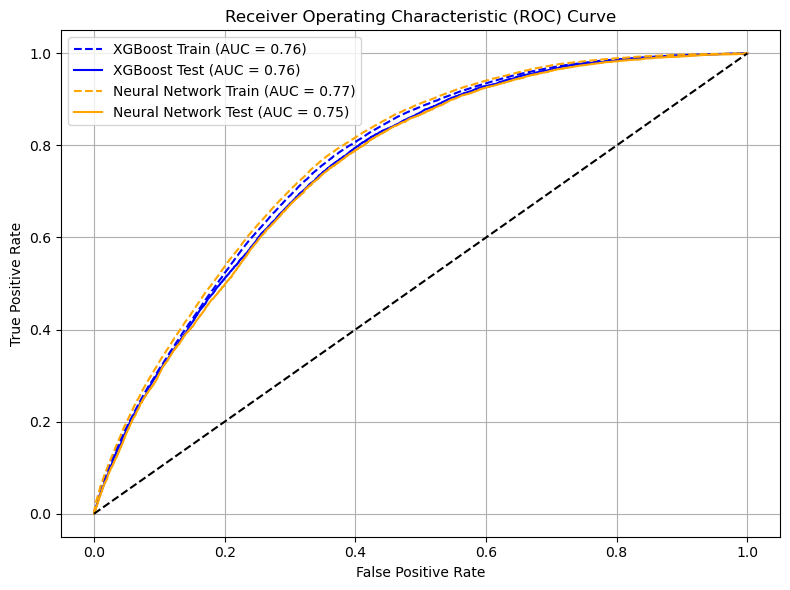

In [78]:
# List of model names and their predicted probabilities
models = ['XGBoost', 'Neural Network']
train_probabilities = [y_proba_train2, y_probs_train3]  
test_probabilities = [y_probs_xgb, y_probs_NN]  

plt.figure(figsize=(8, 6))

for i in range(len(models)):
    # ROC curve and AUC for train set
    fpr_train, tpr_train, _ = roc_curve(y_train, train_probabilities[i])
    auc_train = auc(fpr_train, tpr_train)

    # ROC curve and AUC for test set
    fpr_test, tpr_test, _ = roc_curve(y_test, test_probabilities[i])
    auc_test = auc(fpr_test, tpr_test)

    if models[i] == 'XGBoost':
        color_train, color_test = 'blue', 'blue'  
    else:
        color_train, color_test = 'orange', 'orange'  
    
    plt.plot(fpr_train, tpr_train, label=f'{models[i]} Train (AUC = {auc_train:.2f})', linestyle='--', color=color_train)
    plt.plot(fpr_test, tpr_test, label=f'{models[i]} Test (AUC = {auc_test:.2f})', color=color_test)

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

The XGBoost model appears to have a slightly better balance between the training and test sets. While both models show good performance, the XGBoost model maintains a closer similarity in its AUC scores between the training (0.76) and test (0.76) sets compared to the Neural Network, which shows a slightly larger discrepancy between the training (0.77) and test (0.75) AUC scores. This suggests that the XGBoost model may generalize slightly better from the training to the test data compared to the Neural Network, indicating a more balanced performance between the two datasets.

## Conclusion<a id="Conclusion"></a>

In evaluating four models—Logistic Regression, Random Forest, XGBoost, and Neural Network—both with and without PCA, the comparison reveals nuanced differences in their performance metrics. All models without PCA showcase slightly better performance in terms of recall, AUC, and precision-recall balance compared to their PCA counterparts. Among all models, the Neural Network performs slightly better on the training set compared to other models in terms of both PR AUC and ROC AUC. However, on the test set, the XGBoost model maintains a slightly higher PR AUC and ROC AUC than the others. Moreover, XGBoost demonstrates a more consistent performance between training and test sets, suggesting better generalization compared to other models. Ultimately, the XGBoost model emerges as the preferable choice due to its slightly superior and more balanced performance across various evaluation metrics and datasets.